# <div style="text-align: center"> <font color='darkred'>"WeRateDogs" Data Wrangling project</font> </div>
---
---

**`Project has 2 Main Stages as below .....`**

## <font color='darkblue'>Stage1: Project Preparation</font> 

### <font color='darkgreen'>1. Questions to be answered</font>

### <font color='darkgreen'>2. Import Required Packages</font>


****

## <font color='darkblue'>Stage2: Main Phases</font> 

### <font color='darkgreen'>1. Data Gathering</font>

### <font color='darkgreen'>2. Data Assessing</font>

### <font color='darkgreen'>3. Data Cleaning and Storing</font>

### <font color='darkgreen'>4. Data Analyzing and Visualizing</font>

### <font color='darkgreen'>5. Making Reports</font>

---
---
---
---

## <font color='darkblue'>Stage1: Project Preparation</font> 

### <font color='darkgreen'>1. Questions to be answered</font>

#### Below are what we are thinking to find out .....

**Q1** What are the main devices/apps that WeRateDogs' users use?

**Q2** Is there a relationship between dog rates and retweet count?

**Q3** Is there a relationship between dog rates and favorite count?

**Q4** Is there a relationship between favorite count retweet count?

**Q5** What time that most of tweets are tweeted at?

**Q6** Is high confidence prediction meet reality more than low ones?

### <font color='darkgreen'>2. Import Required Packages</font>

In [1]:
# import required packages to deal with files and folder
import os
import zipfile

# import required packages to gather required data and read/handle it
# Gathering data needed packages
import tweepy
from tweepy import OAuthHandler           ###################################
from timeit import default_timer as timer ###################################
import requests
import re
import json
import glob
from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup
from scipy import stats
import warnings                            ###################################
warnings.filterwarnings('ignore')          ###################################

# import required packages to read, discover, manipulate, organize, analyze and visualize data
# Assessing and cleaning data needed packages
import pandas as pd
import numpy as np
import datetime 

# Analyze and Visualize data needed packages
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# call magic key words matplotlib
%matplotlib inline

---
---
---

## <font color='darkblue'>Stage2: Main Phases</font> 

### <font color='darkgreen'>1. Data Gathering</font>

**There are <font color='red'>3 datasets</font> required for the project:**

**<font color='red'>1.</font> <font color='darkblue'>twitter_archive_enhanced.csv</font>** **:** `Will be imported as `**<font color='red'>`archive_df`</font>**` DataFrame`

**<font color='red'>2.</font> <font color='darkblue'>image_predictions.tsv</font>** **:** `Will be imported as `**<font color='red'>`image_df`</font>**` DataFrame`

**<font color='red'>3.</font> <font color='darkblue'>tweet_json.txt</font>** **:** `Will be imported as `**<font color='red'>`api_df`</font>**` DataFrame`

---

### <font color='red'>File #1:</font> <font color='darkblue'>twitter_archive_enhanced.csv</font> - a file on hand

* I already **downloaded** this file **manually**. However, I preferred to re-download it **programmatically**

#### <font color='red'>File 1_Step 1.</font>  Download (twitter_archive_enhanced.csv) file programmatically

In [2]:
# Set 'twitter_archive_enhanced.csv' download link to tw_ar_url variable
    # HINT: I got this link by 'Right-Click' on 'twitter_archive_enhanced.csv' at (Project Details) Lesson,
    # then 'Left-Click' on (Copy link address)
archive_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'

# Determine a folder to save 'twitter_archive_enhanced.csv' file to
# This step could be ignored as long as the path is the same which I initiated jupyter notebook from
folder_name = '/Users/maged.b.hennawi' # the same folder I initiated jupyter notebook from. 

# Determine the file name to be saved as in the determined folder
# This will be done by splitting url text and get final element [-1]
archive_file_name = archive_url.split('/')[-1]

# Check extracted name
archive_file_name

'twitter-archive-enhanced.csv'

In [3]:
# Request the file using requests and put it in tw_ar_response variable
archive_response = requests.get(archive_url)

In [4]:
#Open the file using os library in 'wb' mode, and write tw_ar_response.contents to new CSV file and save it
with open(os.path.join(folder_name, archive_file_name), mode='wb') as file:
              file.write(archive_response.content)

#### <font color='red'>File 1_Step 2.</font>  Read (twitter_archive_enhanced.csv) file and import it to Jupyter workspace using pandas DataFrame

In [5]:
# import twitter_archive_enhanced.csv to workspace using pandas DataFrame
archive_df = pd.read_csv(archive_file_name)

In [6]:
# Check imported df before proceeding to next step
archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


---

### <font color='red'>File #2:</font> <font color='darkblue'>image_predictions.tsv</font> - Programmatically downloaded file

#### <font color='red'>File 2_Step 1.</font>  Download (image_predictions.tsv) file programmatically

In [7]:
# Set 'image_predictions.tsv' download link to tw_ar_url variable
    # HINT: I got this link by 'Righ-Click' on (giving URL) at (Project Details) Lesson,
    # then 'Left-Click' on (Copy link address)
image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Determine the file name to be saved as in the default folder
# This will be done by splitting url text and get final element [-1]
image_file_name = image_url.split('/')[-1]

# Check extracted name
image_file_name

'image-predictions.tsv'

In [8]:
# Request the file using requests and put it in tw_im_response variable
image_response = requests.get(image_url)

In [9]:
# We can use below code to check if file exist or not before save it
#FWD Webinar Tips

if not os.path.isfile(image_file_name):
    with open (image_file_name, mode='wb') as file:
        file.write(image_response.content)

#### <font color='red'>File 2_Step 2.</font>  Read (image_predictions.tsv) file and import it to Jupyter workspace using pandas DataFrame

In [10]:
# import image_predictions.tsv to workspace using pandas DataFrame
image_df = pd.read_csv(image_file_name, sep='\t')

In [11]:
# Check imported df before proceeding to next step
image_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


---

### <font color='red'>File #3:</font> <font color='darkblue'>tweet_json.txt</font> - API file

#### <font color='red'>File 3_Step 1.</font>  Query Twitter API and Create (tweet_json.txt) file programmatically

In [12]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = '****'
consumer_secret = '****'
access_token = '****'
access_secret = '****'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [13]:
# Experimenting to extract one tweet's id information after creating the API object
exp_tweet = api.get_status(archive_df.tweet_id[0], tweet_mode='extended')
content = exp_tweet._json
print(content)

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [14]:
# Checking the key of the test tweet through content.keys
content.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [15]:
content['user']['followers_count']

8890605

In [16]:
content['id']

892420643555336193

In [17]:
# Getting the 'retweet_count' and favorite_count' and other info for the test tweet 
print(content['user']['followers_count'])
print(exp_tweet.id)
print(exp_tweet.in_reply_to_status_id)
print(exp_tweet.place)
print(exp_tweet.retweeted)
print(exp_tweet.favorited)
print(exp_tweet.possibly_sensitive)
print(exp_tweet.lang)
print(exp_tweet.favorite_count)
print(exp_tweet.retweet_count)

8890605
892420643555336193
None
None
False
False
False
en
35420
7481


In [18]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

2356

In [19]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as outfile:
# This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
end = timer()
print(end - start)
print(fails_dict)

0.00046769999971729703
{}


#### <font color='red'>File 3_Step 2.</font>  Extract required info from (tweet_json.txt) and load it to Jupyter workspace using pandas DataFrame

#### External Help: [How to load and parse a JSON file with multiple JSON objects in Python](https://www.kite.com/python/answers/how-to-load-and-parse-a-json-file-with-multiple-json-objects-in-python)

In [20]:
# Below code will open the created tweet_json.txt" file
# then, - Using for loop - the code will load each line in the file as json data with its own object
# then, append it to a list of dict 'api_json_data'.
# So we can extract any info using list indices and dict keys.

# List of dictionaries to be able to extract any info using list indices and dict keys
api_json_data = []
api_json_file = "tweet_json.txt"

file = open(api_json_file)
for line in file:
	api_json_line = json.loads(line)
	api_json_data.append(api_json_line)

# Test 'api_json_data' list contents
print(api_json_data[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [21]:
# Test 'api_json_data' list of dictionaries contents
print(api_json_data[0]['user'])

{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': 'Adoptable Dogs ➡️', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/4W7xbIw5dg', 'entities': {'url': {'urls': [{'url': 'https://t.co/4W7xbIw5dg', 'expanded_url': 'https://campsite.bio/weratedogs', 'display_url': 'campsite.bio/weratedogs', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 8869464, 'friends_count': 19, 'listed_count': 5924, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 145970, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 12991, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg

In [22]:
# List of dictionaries to build and convert to a DataFrame later
api_df_list = []

# Create the for loop with try-except block
i = 0
for api_json_data[i] in api_json_data:
    try:
        # Print tweet index to gauge items in progress
        tweet_id = api_json_data[i]['id']
        print(str(i) + "_" + str(tweet_id) + ": " + "Success")

        # Start getting our target        
        tweet_id = api_json_data[i]['id']      # this line is duplicated and could be deleted
        favorite_count = api_json_data[i]['favorite_count']
        retweet_count = api_json_data[i]['retweet_count']
        friends_count = api_json_data[i]['user']['friends_count']
        followers_count = api_json_data[i]['user']['followers_count']

        # Append to list of dictionaries
        api_df_list.append({'tweet_id': int(tweet_id),
                            'favorite_count': favorite_count,
                            'retweet_count': retweet_count,                            
                            'followers_count': followers_count,
                            'friends_count': friends_count})
    
    # Not best practice to catch all exceptions but fine for this short script
    except Exception as e:
        print(str(i)) + "_" + str(tweet_id) + ": " + str(e)
        
    i += 1

0_892420643555336193: Success
1_892177421306343426: Success
2_891815181378084864: Success
3_891689557279858688: Success
4_891327558926688256: Success
5_891087950875897856: Success
6_890971913173991426: Success
7_890729181411237888: Success
8_890609185150312448: Success
9_890240255349198849: Success
10_890006608113172480: Success
11_889880896479866881: Success
12_889665388333682689: Success
13_889638837579907072: Success
14_889531135344209921: Success
15_889278841981685760: Success
16_888917238123831296: Success
17_888804989199671297: Success
18_888554962724278272: Success
19_888078434458587136: Success
20_887705289381826560: Success
21_887517139158093824: Success
22_887473957103951883: Success
23_887343217045368832: Success
24_887101392804085760: Success
25_886983233522544640: Success
26_886736880519319552: Success
27_886680336477933568: Success
28_886366144734445568: Success
29_886267009285017600: Success
30_886258384151887873: Success
31_886054160059072513: Success
32_885984800019947

1662_681610798867845120: Success
1663_681579835668455424: Success
1664_681523177663676416: Success
1665_681340665377193984: Success
1666_681339448655802368: Success
1667_681320187870711809: Success
1668_681302363064414209: Success
1669_681297372102656000: Success
1670_681281657291280384: Success
1671_681261549936340994: Success
1672_681242418453299201: Success
1673_681231109724700672: Success
1674_681193455364796417: Success
1675_680970795137544192: Success
1676_680959110691590145: Success
1677_680940246314430465: Success
1678_680934982542561280: Success
1679_680913438424612864: Success
1680_680889648562991104: Success
1681_680836378243002368: Success
1682_680805554198020098: Success
1683_680801747103793152: Success
1684_680798457301471234: Success
1685_680609293079592961: Success
1686_680583894916304897: Success
1687_680497766108381184: Success
1688_680494726643068929: Success
1689_680473011644985345: Success
1690_680440374763077632: Success
1691_680221482581123072: Success
1692_68020

In [23]:
# Create DataFrame from list of dictionaries (api_df_list)
api_df = pd.DataFrame(api_df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count', 'followers_count', 'friends_count'])
api_df = api_df.sort_values('tweet_id').reset_index(drop=True)
# Test result using one id 892420643555336193
api_df[api_df['tweet_id'] == 892420643555336193].head(50)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count
2330,892420643555336193,35502,7497,8869464,19


In [24]:
api_df.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count
0,666020888022790149,2360,453,8869482,19
1,666029285002620928,120,41,8869482,19
2,666033412701032449,109,39,8869482,19
3,666044226329800704,266,125,8869482,19
4,666049248165822465,96,40,8869482,19


---
---
---
---

### <font color='darkgreen'>2. Data Assessing</font>

**`Assessing data process will go through 2 sections:`**

**1. Assessing Effort.**

**2. Assessing Result.**

---

### <font color='red'>Section 1:</font> <font color='darkblue'>Assessing Effort</font>

#### </font> <font color='green'>Visual and Programmatic Assessments</font>

- __Important Note:__ some of visual assessment done using spreadsheet, so it will not appear in this notebook.

In [25]:
# Using pd.set_option to control the column text width pandas will display, for more effective visual assessment
pd.set_option("display.max_colwidth", -1)

# Using pd.set_option to control the maximum columns pandas will display, for more effective visual assessment
pd.set_option('display.max_columns', None)

---
---

##### <font color='darkblue'>archive_df Table</font>

In [26]:
# Display the archive_df table
archive_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1528,690348396616552449,NaN,NaN,2016-01-22 01:40:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Oddie. He's trying to communicate. 12/10 very solid effort (vid by @kaleseyy) https://t.co/JjxriLqZOL,NaN,NaN,NaN,https://vine.co/v/iejBWerY9X2,12,10,Oddie,None,None,None,None
1182,718971898235854848,NaN,NaN,2016-04-10 01:20:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sadie. She is prepared for battle. 10/10 https://t.co/JRckDkZVRT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718971898235854848/photo/1,10,10,Sadie,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 simply brilliant pup https://t.co/V6ZzG45zzG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780179869698/photo/1,12,10,None,None,None,None,None


In [27]:
# Check the 'Not a NaN' values in
# 'in_reply_to' columns ['in_reply_to_status_id, 'in_reply_to_user_id'], 
# for knowing the data more
archive_df_reply_check = archive_df[~archive_df['in_reply_to_status_id'].isnull()]
archive_df_reply_check.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
1914,674330906434379776,6.658147e+17,1.637468e+07,2015-12-08 20:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13/10\n@ABC7,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
498,813130366689148928,8.131273e+17,4.196984e+09,2016-12-25 21:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [28]:
# Check the 'Not a NaN values' in 
# 'retweeted' columns ['retweeted_status_id, 'retweeted_status_user_id', 'retweeted_status_timestamp'], 
# for knowing the data more
archive_df_retweeted_check = archive_df[~archive_df['retweeted_status_id'].isnull()]
archive_df_retweeted_check.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
656,791780927877898241,NaN,NaN,2016-10-27 23:17:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Maddie. She gets some wicked air time. Hardcore barkour. 11/10 nimble af https://t.co/bROYbceZ1u,7.467577e+17,4.196984e+09,2016-06-25 17:31:25 +0000,"https://vine.co/v/5BYq6hmrEI3,https://vine.co/v/5BYq6hmrEI3",11,10,Maddie,None,None,None,None
307,835685285446955009,NaN,NaN,2017-02-26 02:57:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Rory. He's got an interview in a few minutes. Looking spiffy af. Nervous as h*ck tho. 12/10 would hire https://t.co/…,7.869631e+17,4.196984e+09,2016-10-14 16:13:10 +0000,https://twitter.com/dog_rates/status/786963064373534720/photo/1,12,10,Rory,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7T…",8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,"https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13,10,Jamesy,None,None,pupper,None


In [29]:
# Check if 'source' column contains any device other than 'iPhone', if yes, it could be a part of our analysis
archive_df_sourcecheck = archive_df[~archive_df['source'].str.contains('iPhone', na=False)]
archive_df_sourcecheck.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
270,841314665196081154,NaN,NaN,2017-03-13 15:47:01 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Max. There's no way in h*ck you're taking his pacifier. Binky promises it's not happening. 13/10 very good stubborn boy https://t.co/9lVAqDEvZ5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841314665196081154/video/1,13,10,Max,None,None,None,None
1409,699060279947165696,NaN,NaN,2016-02-15 02:38:53 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Yukon. He pukes rainbows. 12/10 magical af https://t.co/n6wND1v7il,NaN,NaN,NaN,https://vine.co/v/inlmMHxtqDD,12,10,Yukon,None,None,None,None
2268,667517642048163840,NaN,NaN,2015-11-20 01:39:42 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s https://t.co/fh5KflzBR0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667517642048163840/photo/1,8,10,Dook,None,None,None,None


In [30]:
# Get main info about archive_df using .info() method
print('archive_df Info')
print('')
print(archive_df.info())

archive_df Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo           

In [31]:
# Check duplicates in archive_df using .duplicated().sum() method
print('archive_df duplicates')
print('')
print(archive_df.duplicated().sum())

archive_df duplicates

0


In [32]:
# Check 'archive_df' unique values
print('archive_df unique values')
print('')
print(archive_df.nunique())

archive_df unique values

tweet_id                      2356
in_reply_to_status_id         77  
in_reply_to_user_id           31  
timestamp                     2356
source                        4   
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      25  
retweeted_status_timestamp    181 
expanded_urls                 2218
rating_numerator              40  
rating_denominator            18  
name                          957 
doggo                         2   
floofer                       2   
pupper                        2   
puppo                         2   
dtype: int64


In [33]:
# Check 'source' values counts, to determine if has valuable info to be considered
print('archive_df.source values_counts')
print('')
print(archive_df.source.value_counts())

archive_df.source values_counts

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64


* **<font color='red'>Note:</font> used device/app could be extracted from source column during EDA.**

In [34]:
# Check dog stages columns' values counts, to know how to deal with it
print('archive_df.doggo values_counts')
print('')
print(archive_df.doggo.value_counts())

print('-'*45)
print('archive_df.floofer values_counts')
print('')
print(archive_df.floofer.value_counts())

print('-'*45)
print('archive_df.pupper values_counts')
print('')
print(archive_df.pupper.value_counts())

print('-'*45)
print('archive_df.puppo values_counts')
print('')
print(archive_df.puppo.value_counts())

archive_df.doggo values_counts

None     2259
doggo    97  
Name: doggo, dtype: int64
---------------------------------------------
archive_df.floofer values_counts

None       2346
floofer    10  
Name: floofer, dtype: int64
---------------------------------------------
archive_df.pupper values_counts

None      2099
pupper    257 
Name: pupper, dtype: int64
---------------------------------------------
archive_df.puppo values_counts

None     2326
puppo    30  
Name: puppo, dtype: int64


In [35]:
# Check rating_denominator value_counts
archive_df.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [36]:
# Check rating_numerator value_counts
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [37]:
# After doing some visual assessment (using spreadsheets), I found 5 wrong rating -mostly during text extraction, 
# 1st digits occurrence took instead of 2nd one-

# Below code will Get the tweet_id(s) for those 5 wrong records
# Note: Retweets and replies rows with not-null value and extended_url with NaN values
# will be ignored to conform analysis scope schema
archive_df.query('text.str.contains("50/50") or text.str.contains("4/20") or text.str.contains("9/11") or text.str.contains("7/11") or text.str.contains("1/2")')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [38]:
# After doing some visual assessment (using spreadsheets), I found 3 wrong rating -mostly during text extraction, 
#after decimal point value taken instead of the whole value-

# Using pd.set_option to control the column text width pandas will display, for more effective visual assessment
pd.set_option("display.max_colwidth", -1)

# Below code will Get the tweet_id(s) for those 3 wrong records
# Note: Retweets and replies rows with not-null value and extended_url with NaN values
# will be ignored to conform analysis scope schema
archive_df.query('text.str.contains("75/10") or text.str.contains("27/10") or text.str.contains("26/10")')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [39]:
# After doing some visual assessment (using spreadsheets), I found 1 wrong rating -mostly during text extraction, 
#1st digits occurrence while it is not a rating

# Using pd.set_option to control the column text width pandas will display, for more effective visual assessment
pd.set_option("display.max_colwidth", -1)

# Below code will Get the tweet_id for that wrong record
# Note: Retweets and replies rows with not-null value and extended_url with NaN values
# will be ignored to conform analysis scope schema
archive_df.query('text.str.contains("24/7")')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


---
---

##### <font color='darkblue'>image_df Table</font>

In [40]:
# Display the image_df table
image_df.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
707,685169283572338688,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,1,Bernese_mountain_dog,0.975096,True,Appenzeller,0.014578,True,EntleBucher,0.005943,True
887,699072405256409088,https://pbs.twimg.com/ext_tw_video_thumb/699072391083880449/pu/img/fMp1-dvLMeio1Kzk.jpg,1,Shih-Tzu,0.599587,True,Pekinese,0.213069,True,Maltese_dog,0.154293,True
844,695074328191332352,https://pbs.twimg.com/media/CaVmajOWYAA1uNG.jpg,1,Shih-Tzu,0.510106,True,Tibetan_terrier,0.071981,True,Lhasa,0.069231,True
217,670069087419133954,https://pbs.twimg.com/media/CUyQRzHWoAAhF1D.jpg,1,boathouse,0.313829,False,birdhouse,0.138331,False,ashcan,0.045673,False
582,678798276842360832,https://pbs.twimg.com/media/CWuTbAKUsAAvZHh.jpg,1,Airedale,0.583122,True,silky_terrier,0.129567,True,Lakeland_terrier,0.094727,True
56,667065535570550784,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1,jigsaw_puzzle,0.560001,False,doormat,0.103259,False,space_heater,0.042568,False
962,705970349788291072,https://pbs.twimg.com/media/CcwcSS9WwAALE4f.jpg,1,golden_retriever,0.776346,True,Labrador_retriever,0.112413,True,chow,0.036953,True
1408,770293558247038976,https://pbs.twimg.com/media/CrCh5RgW8AAXW4U.jpg,1,Italian_greyhound,0.931668,True,Mexican_hairless,0.038896,True,whippet,0.013151,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
1476,780496263422808064,https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg,1,pug,0.997310,True,Brabancon_griffon,0.001186,True,French_bulldog,0.000428,True


In [41]:
# Get main info about image_df using .info() method
print('image_df Info')
print('')
print(image_df.info())

image_df Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


In [42]:
# Check duplicates in image_df using .duplicated().sum() method
print('image_df duplicates')
print('')
print(image_df.duplicated().sum())

image_df duplicates

0


In [43]:
# check 'image_df' unique values
print('image_df unique values')
print('')
print(image_df.nunique())

image_df unique values

tweet_id    2075
jpg_url     2009
img_num     4   
p1          378 
p1_conf     2006
p1_dog      2   
p2          405 
p2_conf     2004
p2_dog      2   
p3          408 
p3_conf     2006
p3_dog      2   
dtype: int64


In [44]:
# check 'p1' values counts
print('image_df.p1 values_counts')
print('')
print(image_df.p1.value_counts())

image_df.p1 values_counts

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
revolver              1  
desktop_computer      1  
teapot                1  
cuirass               1  
fire_engine           1  
Name: p1, Length: 378, dtype: int64


---
---

##### <font color='darkblue'>api_df Table</font>

In [45]:
# Display the api_df table
api_df.sample(50)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count
30,666418789513326592,112,41,8869482,19
411,673708611235921920,1018,269,8869481,19
929,697943111201378304,2336,657,8869479,19
855,692187005137076224,2476,791,8869479,19
1676,789903600034189313,10342,4131,8869473,19
1345,747512671126323200,5418,1578,8870126,19
1684,790723298204217344,0,2307,8869473,19
1025,705898680587526145,2310,538,8869480,19
1504,766069199026450432,4180,841,8869476,19
296,671186162933985280,692,193,8869480,19


In [46]:
# get main info about api_df using .info() method
print('api_df Info')
print('')
print(api_df.info())

api_df Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   favorite_count   2331 non-null   int64
 2   retweet_count    2331 non-null   int64
 3   followers_count  2331 non-null   int64
 4   friends_count    2331 non-null   int64
dtypes: int64(5)
memory usage: 91.2 KB
None


---

### <font color='red'>Section 2:</font> <font color='darkblue'>Assessing Result</font>

### </font> <font color='green'>Tidiness issues</font>

#### **<font color='#7f0000'>(1) Multiple variables are stored in one column</font>**


**1.** **<font color='blue'>timestamp</font>** column's **<font color='blue'>values</font>** in **`archive_df`** table should be splitted into **<font color='red'>Date and Time</font>** 2 column's.



#### **<font color='#7f0000'>(2) Column headers are values, not variable names.</font>**


**2.** in **`archive_df`** table **<font color='blue'>Column headers (['doggo'] , ['floofer'] ,	['pupper'] , ['puppo'])</font>** **<font color='red'>are values, not a variable names.</font>** **`That resulting 1 variable ['dog_stage'] is stored 4 columns in a messy way`**.


**3.** in **`image_df`** table **<font color='blue'>Column headers (['p1'] , ['p2'] , ['p3'])</font>** **<font color='red'>are values, not a variable names.</font>** **`That resulting 2 variables ['prediction_number' and 'prediction_result'] are stored 3 columns in a messy way`**.


**4.** in **`image_df`** table **<font color='blue'>Column headers (['p1_conf'] , ['p2_conf'] , ['p3_conf'])</font>** **<font color='red'>are values, not a variable names.</font>** **`That resulting 2 variables ['prediction_number' and 'prediction_confident'] are stored 3 columns in a messy way`**.


**5.** in **`image_df`** table **<font color='blue'>Column headers (['p1_dog'] , ['p2_dog'] , ['p3_dog'])</font>** **<font color='red'>are values, not a variable names.</font>** **`That resulting 2 variables ['prediction_number' and 'prediction_validity'] are stored 3 columns in a messy way`**.



#### **<font color='#7f0000'>(3) A single observational unit is stored in multiple tables.</font>**

**6.** **<font color='red'>api_df</font>** table **<font color='blue'>should be a part of </font>** **<font color='red'>archive_df</font>** table.



### </font> <font color='green'>Quality issues</font>

#### <font color='#7f0000'>(1) Completeness Issues</font>


**<font color='red'>NO Completeness ISSUE DETECTED.</font>**


---
#### <font color='#7f0000'>(2) Validity Issues</font>


**1.** The **<font color='blue'>p</font>** column's **<font color='blue'>(['p1], ['p1_conf'] , ['p1_dog'] , etc.])</font>** in **`image_df`** table has  **<font color='red'>'Non-descriptive columns’ names</font>** needs to be **<font color='red'>adjusted.</font>**


**2.** There are **<font color='blue'>Retweets and replies</font>** column's and rows in **`archive_df`** and that doesn't conform to **<font color='red'>analysis scope schema</font>**, so they needs to be **<font color='red'>dropped.</font>**


**3.** There are some **<font color='blue'> records</font>** in **`archive_df`** and that doesn't has **<font color='blue'>expanded_urls</font>**, which means **<font color='red'>no image exist</font>**, so they needs to be **<font color='red'>dropped.</font>**

expanded_urls


**3.** **<font color='blue'>timestamp</font>** column's **<font color='blue'>values</font>** in **`archive_df`** table contains extra **<font color='red'>'+0000'</font>** needs to be **<font color='red'>removed.</font>**
  
  
**4.** **<font color='blue'>retweeted_status_timestamp</font>** column's **<font color='blue'>values</font>** in **`archive_df`** table contains extra **<font color='red'>'+0000'</font>**.





---
#### <font color='#7f0000'>(3) Accuracy Issues</font>

**1.** **<font color='blue'>name</font>** column's **<font color='blue'>values</font>** in **`archive_df`** table contains **<font color='red'>inaccurate</font>** pet names like the letter **“a”** and **“an”**.


**2.** about **11 records** in **<font color='blue'>rating_numerator</font>** and **<font color='blue'>rating_denominator</font>** columns' **<font color='blue'>values</font>** in **`archive_df`** table are **<font color='red'>aggregated and featuring many dogs</font>** based on **dog counts** in the picture, while it's supposed to be for **<font color='red'>1 dog</font>**. **`That clearly appears in [['rating_numerator'] > 40]`**


**3.** about **5 records** in **<font color='blue'>rating_numerator</font>** and **<font color='blue'>rating_denominator</font>** columns' **<font color='blue'>values</font>** in **`archive_df`** table are **<font color='red'>inaccurate</font>** -_mostly during text extraction, 1st digits occurrence took instead of 2nd one_- and needed to be **<font color='red'>corrected</font>**,  **`That clearly appears in [['tweet_id'] == 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296]]`**


**4.** about **3 records** in **<font color='blue'>rating_numerator</font>** column's **<font color='blue'>values</font>** in **`archive_df`** table is **<font color='red'>inaccurate</font>** -_mostly during text extraction, after decimal point value taken instead of the whole value_- and needed to be **<font color='red'>corrected</font>**,  **`That clearly appears in [['tweet_id'] == 786709082849828864, 778027034220126208, 680494726643068929]]`**


**5.** **1 records** in **<font color='blue'>rating_numerator</font>** and **<font color='blue'>rating_denominator</font>** columns' **<font color='blue'>values</font>** in **`archive_df`** table are **<font color='red'>inaccurate</font>** -_mostly during text extraction, 1st digits occurrence while it is not a rating_- and needed to be **<font color='red'>totally removed</font>**,  **`That clearly appears in [['tweet_id'] == 810985000000000000]]`**


 

---
#### <font color='#7f0000'>(3) Consistency Issues</font>

**1.** **<font color='blue'>tweet_id</font>** columns' **<font color='blue'>Dtypes</font>** in **`archive_df`, `image_df`**, and **`api_df`** tables are **<font color='red'>int64</font>** while **no calculus** will be made, so it's better to be **<font color='red'>str</font>**.


**2.** **<font color='blue'>in_reply_to_status_id</font>** column's **<font color='blue'>Dtype</font>** in **`archive_df`** table is **<font color='red'>float64</font>** while **no calculus** will be made, so it's better to be **<font color='red'>str</font>**.</font>**


**3.** **<font color='blue'>in_reply_to_user_id</font>** column's **<font color='blue'>Dtype</font>** in **`archive_df`** table is **<font color='red'>float64</font>** while **no calculus** will be made, so it's better to be **<font color='red'>str</font>**.</font>**


**4.** **<font color='blue'>timestamp</font>** column's **<font color='blue'>Dtype</font>** in **`archive_df`** table is **<font color='red'>object (str)</font>** while it's supposed to be **<font color='red'>datetime</font>**.


**5.** **<font color='blue'>retweeted_status_id</font>** column's **<font color='blue'>Dtype</font>** in **`archive_df`** table is **<font color='red'>float64</font>** while **no calculus** will be made, so it's better to be **<font color='red'>str</font>**.</font>**


**6.** **<font color='blue'>retweeted_status_user_id</font>** column's **<font color='blue'>Dtype</font>** in **`archive_df`** table is **<font color='red'>float64</font>** while **no calculus** will be made, so it's better to be **<font color='red'>str</font>**.</font>**


**7.** **<font color='blue'>retweeted_status_timestamp</font>** column's **<font color='blue'>Dtype</font>** in **`archive_df`** table is **<font color='red'>object (str)</font>** while it's supposed to be **<font color='red'>datetime</font>**.


**8.** **<font color='blue'>(['doggo'] , ['floofer'] , ['pupper'] , ['puppo'])</font>** columns' in **`archive_df`** table contains **<font color='red'>Inconsistent values</font>** regarding representation of **<font color='red'>null</font>** values, as **<font color='red'>“None” strings</font>** in the (doggo, floofer, pupper, puppo) columns.


**9.** **<font color='blue'>['name']</font>** column in **`archive_df`** table contains **<font color='red'>Inconsistent values</font>** regarding representation of **<font color='red'>null</font>** values, as **<font color='red'>“None” strings</font>**.


**10.** **<font color='blue'>(['doggo'] , ['floofer'] , ['pupper'] , ['puppo'])</font>** columns' **<font color='blue'>Dtype</font>** in **`archive_df`** table are **<font color='red'>object (str)</font>** while it supposed to be **<font color='red'>category</font>** dtype.


**11.** **<font color='blue'>rating_numerator</font>** column's **<font color='blue'>Dtypes</font>** in **`archive_df`** tables is **<font color='red'>int64</font>** while -originally- it has **decimal values** at text column, so it should be **<font color='red'>float</font>**.


---
---
---
---

### <font color='darkgreen'>3. Data Cleaning and Storing</font>

**`Cleaning data process will go through 2 sections:`**

**1. Cleaning Preparation.**

**2. Cleaning Process.**

**3. Cleaning Result Storing.**

### <font color='#7f0000'>Important Note</font> <font color='#060644'>Data issues will be cleaned by group, if a specific group(s) issues requires same cleaning efforts/code</font> 

### <font color='red'>Section 1:</font> <font color='darkblue'>Cleaning Preparation</font>

**`Making a copy from the 3 dfs, to keep the original ones AS IS.`**

In [47]:
archive_df_clean = archive_df.copy()
image_df_clean = image_df.copy()
api_df_clean = api_df.copy()

**`Test the copied _clean dfs`**

In [48]:
# Using pd.reset_option to back to default column text width pandas will display
pd.reset_option("display.max_colwidth")

# Using pd.reset_option to back to default maximum columns pandas will display
pd.reset_option('display.max_columns')

In [49]:
archive_df_clean.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2226,668274247790391296,NaN,NaN,2015-11-22 03:46:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sophie. Her son just got in the car to le...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668274247...,10,10,Sophie,None,None,None,None


In [50]:
image_df_clean.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1616,802265048156610565,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True


In [51]:
api_df_clean.sample(1)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count
2097,846153765933735936,30712,8700,8869468,19


---

### <font color='red'>Section 2:</font> <font color='darkblue'>Cleaning Process</font>

---
---

### `archive_df`

### <font color='red'>Group 1:</font> <font color='blue'>"No Action Needed" Group</font>
* **<font color='#7f0000'>All of below data issues will not affect our analysis scope, so it will be as it is without any CLEANING action from our side**
    
    * **<font color='red'>Quality - </font>** **<font color='#000000'>Validity Issues:</font>** 
        * **4.** **<font color='blue'>retweeted_status_timestamp</font>** column's **<font color='blue'>values</font>** in **`archive_df`** table contains extra **<font color='red'>'+0000'</font>**.
    
    * **<font color='red'>Quality - </font>** **<font color='#000000'>Accuracy Issues:</font>**
        * **1.** **<font color='blue'>name</font>** column's **<font color='blue'>values</font>** in **`archive_df`** table contains **<font color='red'>inaccurate</font>** pet names like the letter **“a”** and **“an”**.
    
    * **<font color='red'>Quality - </font>** **<font color='#000000'>Consistency Issues:</font>**
        * **2.** **<font color='blue'>in_reply_to_status_id</font>** column's **<font color='blue'>Dtype</font>** in **`archive_df`** table is **<font color='red'>float64</font>** while **no calculus** will be made, so it's better to be **<font color='red'>str</font>**.</font>
        * **3.** **<font color='blue'>in_reply_to_user_id</font>** column's **<font color='blue'>Dtype</font>** in **`archive_df`** table is **<font color='red'>float64</font>** while **no calculus** will be made, so it's better to be **<font color='red'>str</font>**.</font>
        * **5.** **<font color='blue'>retweeted_status_id</font>** column's **<font color='blue'>Dtype</font>** in **`archive_df`** table is **<font color='red'>float64</font>** while **no calculus** will be made, so it's better to be **<font color='red'>str</font>**.</font>
        * **6.** **<font color='blue'>retweeted_status_user_id</font>** column's **<font color='blue'>Dtype</font>** in **`archive_df`** table is **<font color='red'>float64</font>** while **no calculus** will be made, so it's better to be **<font color='red'>str</font>**.</font>
        * **7.** **<font color='blue'>retweeted_status_timestamp</font>** column's **<font color='blue'>Dtype</font>** in **`archive_df`** table is **<font color='red'>object (str)</font>** while it's supposed to be **<font color='red'>datetime</font>**.
        * **9.** **<font color='blue'>['name']</font>** column in **`archive_df`** table contains **<font color='red'>Inconsistent values</font>** regarding representation of **<font color='red'>null</font>** values, as **<font color='red'>“None” strings</font>**.

---
---

### <font color='red'>Group 2:</font> <font color='blue'>"Getting Original Tweets with Images" Group</font>
* **<font color='#7f0000'>Cleaning all of the below data issues will help us getting original tweets with image only**

     * **<font color='red'>Quality - </font>** **<font color='#000000'>Validity Issues:</font>** 

        * **2.** There are **<font color='blue'>Retweets and replies</font>** column's and rows in **`archive_df`** and that doesn't conform to **<font color='red'>analysis scope schema</font>**, so they needs to be **<font color='red'>dropped.</font>**

        * **3.** There are some **<font color='blue'>records</font>** in **`archive_df`** and that doesn't has **<font color='blue'>expanded_urls</font>**, which means **<font color='red'>no image exist</font>**, so they needs to be **<font color='red'>dropped.</font>**

##### Define

* **Use** the `image_prediction table` to guide the selection and removal of tweets without photos in the archive table**
* **Filter** `archive_df` to contains only (Original Tweets) that has (image).
* **Drop** the records in `archive_df` and that doesn't has expanded_urls.
* **Drop** Retweets and replies coulmns in `archive_df`.

##### Code & Test

In [52]:
# Most of below code got from FWD Discourse community

#Use the image_prediction table to guide the selection and removal of tweets without photos in the archive table
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_image = list(image_df_clean.tweet_id.unique())

# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == archive_df_clean.tweet_id.isin(tweets_with_image).sum()

# Cleaning in action ;)
archive_df_clean = archive_df_clean[archive_df_clean.tweet_id.isin(tweets_with_image)]

# TEST
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

In [53]:
#In the following part, the following redundant columns (in_reply_to_status_id, in_reply_to_user_id, 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') will be utilized to shed the retweet and replies from our datasets and then will be dropped.
# Throwback to the archive dataset to extract the tweets that include data in the retweet_status_id.
retweet_entries = archive_df_clean.retweeted_status_id.notnull()
archive_df_clean[retweet_entries].shape[0]

# Dropping the retweets from the archive data set
archive_df_clean = archive_df_clean[~retweet_entries]

# TEST
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

In [54]:
# Extracting replies entries with the same method as the retweets
# Follow the same logic as above but with the column in_reply_to_status_id

# Throwback to the archive dataset to extract the tweets that include data in the retweet_status_id.
replies_entries = archive_df_clean.in_reply_to_status_id.notnull()
archive_df_clean[replies_entries].shape[0]

# Dropping the retweets from the archive data set
archive_df_clean = archive_df_clean[~replies_entries]

# TEST
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  doggo                       1971 

In [55]:
# Now we check the image_prediction table for extra tweet ids not in the archive table
np.logical_not(image_df_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))


# Dropping the retweets and replies ids from the image prediction dataframe
image_df_clean[~np.logical_not(image_df_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [56]:
# TEST
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [57]:
# Drop Retweets and replies columns in archive_df_clean.
archive_df_clean = archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [58]:
archive_df_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2307,666826780179869698,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
732,781524693396357120,2016-09-29 16:03:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Idk why this keeps happening. We only rate dog...,https://twitter.com/dog_rates/status/781524693...,12,10,None,None,None,None,None


In [59]:
# TEST
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
dtypes: int64(3), object(9)
memory usage: 200.2+ KB


---
---

### <font color='red'>Group 3:</font> <font color='blue'>"Dogtionary Cleaning" Group</font>
* **<font color='#7f0000'>All of the below data issues relating to dog_stage name based on dogtionary items**
    
    * **<font color='red'>Tidy Issue - </font>** **<font color='#000000'>Column headers are values, not variable names.</font>**
        
        * **2.** in **`archive_df`** table **<font color='blue'>Column headers (['doggo'] , ['floofer'] ,	['pupper'] , ['puppo'])</font>** **<font color='red'>are values, not a variable names.</font>** **`That resulting 1 variable ['dog_stage'] is stored 4 columns in a messy way`**.    
    * **<font color='red'>Quality - </font>** **<font color='#000000'>Consistency Issues:</font>** 
    
        * **8.** **<font color='blue'>(['doggo'] , ['floofer'] , ['pupper'] , ['puppo'])</font>** columns' in **`archive_df`** table contains **<font color='red'>Inconsistent values</font>** regarding representation of **<font color='red'>null</font>** values, as **<font color='red'>“None” strings</font>** in the (doggo, floofer, pupper, puppo) columns.

        * **10.** **<font color='blue'>(['doggo'] , ['floofer'] , ['pupper'] , ['puppo'])</font>** columns' **<font color='blue'>Dtype</font>** in **`archive_df`** table are **<font color='red'>object (str)</font>** while it supposed to be **<font color='red'>category</font>** dtype.
 

##### Define

* **Concatenate** the 4 ['doggo', 'puppo', 'pupper','floofer'] columns in one new column in`archive_df`.
* **Replace** 'None' values with an empty str '' in the new column.
* **Replace** the empty str '' values with NaN values in the new column.
* **Separate** any value contains more than 1 stage by a dash (-) sign, using replace method.
* **Change** the columns Dtype from str to category using .astype() method.

##### Code & Test

In [60]:
# Create a new column 'dog_stage' in archive_df_clean contains the concatenated values in ['doggo', 'puppo', 'pupper','floofer'] columns
archive_df_clean['dog_stage'] = archive_df_clean['doggo'] + archive_df_clean['puppo'] + archive_df_clean['pupper'] + archive_df_clean['floofer']
# Test
archive_df_clean['dog_stage'].sample(5)

331     doggoNoneNoneNone
1153     NoneNoneNoneNone
1816     NoneNoneNoneNone
2301     NoneNoneNoneNone
1841     NoneNoneNoneNone
Name: dog_stage, dtype: object

In [61]:
# Replace 'None' values with an empty str '' in the 'dog_stage' new column
archive_df_clean.dog_stage = archive_df_clean.dog_stage.str.replace('None', '')
# Test
archive_df_clean.dog_stage.value_counts()


                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [62]:
# Replace the empty str '' values with NaN values in the 'dog_stage' new column
archive_df_clean.dog_stage = archive_df_clean.dog_stage.replace(r'^\s*$', np.nan, regex=True)
# Test
archive_df_clean.dog_stage.value_counts()

pupper          201
doggo            63
puppo            22
doggopupper       8
floofer           7
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [63]:
# Separate any value contains more than 1 stage by a dash (-) sign, using replace method
archive_df_clean.dog_stage = archive_df_clean.dog_stage.str.replace('doggopupper', 'doggo-pupper')
archive_df_clean.dog_stage = archive_df_clean.dog_stage.str.replace('doggofloofer', 'doggo-floofer')
archive_df_clean.dog_stage = archive_df_clean.dog_stage.str.replace('doggopuppo', 'doggo-puppo')

# Test
archive_df_clean.dog_stage.value_counts()

pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-puppo        1
doggo-floofer      1
Name: dog_stage, dtype: int64

In [64]:
# Change dog_stage column Dtype from str to category using .astype() method in archive_df_clean
archive_df_clean.dog_stage = archive_df_clean.dog_stage.astype('category')

# Test
archive_df_clean.dog_stage.sample()

1856    NaN
Name: dog_stage, dtype: category
Categories (7, object): ['doggo', 'doggo-floofer', 'doggo-pupper', 'doggo-puppo', 'floofer', 'pupper', 'puppo']

---
---

### <font color='red'>Group 4:</font> <font color='blue'>"Dog Rating" Group</font>
* **<font color='#7f0000'>All of the below data cleaning issues are relating to dog rating columns ['rating_numerator'] and ['rating_denominator']**

    * **<font color='red'>Quality -</font>** **<font color='#000000'>Accuracy Issues:</font>**
    
        * **2.** about **11 records** in **<font color='blue'>rating_numerator</font>** and **<font color='blue'>rating_denominator</font>** columns' **<font color='blue'>values</font>** in **`archive_df`** table are **<font color='red'>aggregated and featuring many dogs</font>** based on **dog counts** in the picture, while it's supposed to be for **<font color='red'>1 dog</font>**. **`That clearly appears in [['rating_numerator'] > 40]`**
        
        * **3.** about **5 records** in **<font color='blue'>rating_numerator</font>** and **<font color='blue'>rating_denominator</font>** columns' **<font color='blue'>values</font>** in **`archive_df`** table are **<font color='red'>inaccurate</font>** -_mostly during text extraction, 1st digits occurrence took instead of 2nd one_- and needed to be **<font color='red'>corrected</font>**,  **`That clearly appears in [['tweet_id'] == 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296]]`**
        
        * **4.** about **3 records** in **<font color='blue'>rating_numerator</font>** column's **<font color='blue'>values</font>** in **`archive_df`** table is **<font color='red'>inaccurate</font>** -_mostly during text extraction, after decimal point value taken instead of the whole value_- and needed to be **<font color='red'>corrected</font>**,  **`That clearly appears in [['tweet_id'] == 786709082849828864, 778027034220126208, 680494726643068929]]`**
    
        * **5.** **1 records** in **<font color='blue'>rating_numerator</font>** and **<font color='blue'>rating_denominator</font>** columns' **<font color='blue'>values</font>** in **`archive_df`** table are **<font color='red'>inaccurate</font>** -_mostly during text extraction, 1st digits occurrence while it is not a rating_- and needed to be **<font color='red'>totally removed</font>**,  **`That clearly appears in [['tweet_id'] == 810985000000000000]]`**
    
    * **<font color='red'>Quality -</font>** **<font color='#000000'>Consistency Issues:</font>**
        
        * **10.** **<font color='blue'>rating_numerator</font>** column's **<font color='blue'>Dtypes</font>** in **`archive_df`** tables is **<font color='red'>int64</font>** while -originally- it has **decimal values** at text column, so it should be **<font color='red'>float</font>**.


##### Define

* Using regex, **extract** the right dog rating (rating_numerator and rating_denominator) as could as possible from text column and put the result in new column ['temp_rating'].
* **Test** the result randomly and also specifically using above known tweet_ids.

**`The 3 and 5 invalid records`**

**`1 invalid record`**
* **Drop** the record which contains wrong value 24/7 and has (No rating at text column).
* **Replace** any still-wrong value programmatically or manually, according to the number of occurrence.

**`11 aggregated dog rating records`**
* **Split** ['temp_rating'] column into 2 new columns using "/" delimiter, to create new_numerator and new_denominator columns.
* **Convert** Dtypes for the new 2 columns to float.

* **Getting** dogs_count by devide archive_df_clean.new_numerator >= 40]/10.
* **Assign** the value 10 for new_denominator column.

* **Create** the FINAL new rating column with a name 'dog_rating' using calculus (new_numerator/new_denominator)*100, rounding the result to nearest decimal 1 point.


##### Code & Test

In [65]:
# Use regex to extract the right dog rating (rating_numerator and rating_denominator) as could as possible
# Below code will use regex /'(\d+\.?\d?\d?\/\d{1,3})'/ to extract dog rating and store the extracted values
# in temp_rating new column in archive_df_clean
archive_df_clean['temp_rating'] = archive_df_clean.text.str.extract('(\d+\.?\d?\d?\/\d{1,3})', expand = True).astype(str)

# TEST
# Random Test,
# Check one of the 3 wrong rating values which relating to (decimal issue) and see if the code could get the right one
archive_df_clean.query('temp_rating.str.contains("9.75/10")')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,NaN,9.75/10


In [66]:
# TEST
# Based on above random rest result, let's Test the 3 Wrong Values relating to (decimal issue)
#archive_df_clean.query('tweet_id == "786709082849828864"') # --> another testing methodology
#archive_df_clean.query('tweet_id == "778027034220126208"') # --> another testing methodology
#archive_df_clean.query('tweet_id == "680494726643068929"') # --> another testing methodology
archive_df_clean.query('tweet_id == "786709082849828864" or tweet_id == "778027034220126208" or tweet_id == "680494726643068929"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,NaN,9.75/10
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,pupper,11.27/10
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,NaN,11.26/10


In [67]:
# TEST
# Random Test again, 
# Check one of the 5 wrong rating values which relating to (2nd occurrence) and see if the code could get the right one
archive_df_clean.query('temp_rating.str.contains("50/50")')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None,NaN,50/50


In [68]:
# Replace the 5 wrong values with the right ones from text archive_df_clean in the 'temp_rating' new column
archive_df_clean['temp_rating'] = archive_df_clean['temp_rating'].str.replace('50/50', '11/10')
archive_df_clean['temp_rating'] = archive_df_clean['temp_rating'].str.replace('4/20', '13/10')
archive_df_clean['temp_rating'] = archive_df_clean['temp_rating'].str.replace('9/11', '14/10')
archive_df_clean['temp_rating'] = archive_df_clean['temp_rating'].str.replace('7/11', '10/10')
archive_df_clean['temp_rating'] = archive_df_clean['temp_rating'].str.replace('1/2', '9/10')

# TEST
# Test the 5 record which contains the Wrong Values relating to (2nd occurrence)
#archive_df_clean.query('tweet_id == "740373189193256964"') # --> another testing methodology
#archive_df_clean.query('tweet_id == "722974582966214656"') # --> another testing methodology
#archive_df_clean.query('tweet_id == "716439118184652801"') # --> another testing methodology
#archive_df_clean.query('tweet_id == "682962037429899265"') # --> another testing methodology
#archive_df_clean.query('tweet_id == "666287406224695296"') # --> another testing methodology
archive_df_clean.query('tweet_id == "740373189193256964" or tweet_id == "722974582966214656" or tweet_id == "716439118184652801" or tweet_id == "682962037429899265" or tweet_id == "666287406224695296"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None,NaN,14/10
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None,NaN,13/10
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None,NaN,11/10
1662,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None,NaN,10/10
2335,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None,NaN,9/10


In [69]:
# Drop the Record which contains wrong rating (not a rating value) and (No rating exist in text column)
archive_df_clean = archive_df_clean.query('tweet_id != "810984652412424192"')

# TEST
# Test the archive_df_clean after dropping the record which is (not a rating value)
# archive_df_clean.query('tweet_id == "810984652412424192"') # --> another testing methodology
archive_df_clean.query('temp_rating.str.contains("24/7")')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating


In [70]:
# Split ['temp_rating'] into 2 new columns using "/" delimiter with new Dtype float using .astype() method
archive_df_clean[['new_numerator','new_denominator']] = archive_df_clean.temp_rating.str.split("/",expand=True).astype(float)

# TEST
# Check the 2 new created columns 
archive_df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating,new_numerator,new_denominator
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,13/10,13.0,10.0


In [71]:
# TEST
# Check the 2 new created columns Dtype
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1970 non-null   int64   
 1   timestamp           1970 non-null   object  
 2   source              1970 non-null   object  
 3   text                1970 non-null   object  
 4   expanded_urls       1970 non-null   object  
 5   rating_numerator    1970 non-null   int64   
 6   rating_denominator  1970 non-null   int64   
 7   name                1970 non-null   object  
 8   doggo               1970 non-null   object  
 9   floofer             1970 non-null   object  
 10  pupper              1970 non-null   object  
 11  puppo               1970 non-null   object  
 12  dog_stage           303 non-null    category
 13  temp_rating         1970 non-null   object  
 14  new_numerator       1970 non-null   float64 
 15  new_denominator     1970 non-null   fl

In [72]:
# Solve the 11 aggregated dog rating records problem
# Calculating the dogs counts in the tweets featuring many dogs
dogs_count = (archive_df_clean.new_denominator[archive_df_clean.new_numerator >= 40]/10).astype(int)

#TEST
# Check the dog_count with their indices:
print(dogs_count)

433      7
902     15
979      1
1120    17
1228     9
1254     8
1274     5
1351     5
1433     4
1635    11
1779    12
1843     8
2074     1
Name: new_denominator, dtype: int32


In [73]:
# Below code will modify ['new_numerator', 'new_denominator'] for values >= 40
# The new values will be the result of:
    # new_numerator/dogs_count -> for new_numerator column.
    # 10                       -> for new_numerator column.
archive_df_clean.loc[archive_df_clean.new_numerator >= 40, ['new_numerator', 'new_denominator']] = [archive_df_clean.rating_numerator[archive_df_clean.new_numerator >= 40]/dogs_count , 10]

#TEST
# Check [new_numerator and new_denominator] modified values for 'rating_numerator >= 40
archive_df_clean.query('rating_numerator >= 40') #and in_reply_to_status_id == "NaN" and retweeted_status_id == "NaN"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating,new_numerator,new_denominator
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None,NaN,84/70,12.00,10.0
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,NaN,9.75/10,9.75,10.0
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None,NaN,165/150,11.00,10.0
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None,NaN,1776/10,1776.00,10.0
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None,NaN,204/170,12.00,10.0
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None,NaN,11/10,11.00,10.0
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None,NaN,99/90,11.00,10.0
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None,NaN,80/80,10.00,10.0
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None,NaN,45/50,9.00,10.0
1351,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None,NaN,60/50,12.00,10.0


In [74]:
# Create the FINAL new rating column with name dog_rating
# It will calculate (new_numerator/new_denominator)*100, rounding the result to nearest decimal 1 point
archive_df_clean['dog_rating'] = round((archive_df_clean['new_numerator']/archive_df_clean['new_denominator'])*100, 1)

# TEST
# Check the value_counts for the new created column ['dog_rating']
archive_df_clean['dog_rating'].value_counts().sort_values()

135.0        1
17760.0      1
112.7        1
0.0          1
112.6        1
4200.0       1
97.5         1
10.0         4
20.0         9
40.0        15
30.0        19
50.0        32
60.0        32
140.0       34
70.0        51
80.0        95
90.0       151
130.0      254
110.0      398
100.0      419
120.0      450
Name: dog_rating, dtype: int64

In [75]:
# TEST
# Check the new created column ['dog_rating'] in df context
pd.reset_option("display.max_colwidth")
archive_df_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating,new_numerator,new_denominator,dog_rating
588,799422933579902976,2016-11-18 01:24:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Longfellow (prolly sophisticated). He'...,https://twitter.com/dog_rates/status/799422933...,12,10,Longfellow,None,None,None,None,NaN,12/10,12.0,10.0,120.0
1569,687807801670897665,2016-01-15 01:25:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper &amp; Maya. Trooper protects Maya...,https://twitter.com/dog_rates/status/687807801...,11,10,Trooper,None,None,None,None,NaN,11/10,11.0,10.0,110.0


In [76]:
# TEST
#Precaution Test in case of failure dropping NON-ORIGINAL Tweets
archive_df_clean.query('new_denominator >= 15')# and in_reply_to_status_id == "NaN" and retweeted_status_id == "NaN"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating,new_numerator,new_denominator,dog_rating


---
---

### <font color='red'>Group 5:</font> <font color='blue'>"DateTime Issue" Group</font>
* **<font color='#7f0000'>All of the below codes relating to DateTime issue**
    
    * **<font color='red'>Tidy Issues -</font>** **<font color='#000000'>Multiple variables are stored in one column:</font>**
        * **1.** **<font color='blue'>timestamp</font>** column's **<font color='blue'>values</font>** in **`archive_df`** table should be splitted into **<font color='red'>Date and Time</font>** 2 column's.

    * **<font color='red'>Quality -</font>** **<font color='#000000'>(2) Validity Issues</font>**
        * **3.** **<font color='blue'>timestamp</font>** column's **<font color='blue'>values</font>** in **`archive_df`** table contains extra **<font color='red'>'+0000'</font>** needs to be **<font color='red'>removed.</font>**

    * **<font color='red'>Quality -</font>** **<font color='#000000'>(2) Consistency Issues</font>**
        * **4.** **<font color='blue'>timestamp</font>** column's **<font color='blue'>Dtype</font>** in **`archive_df`** table is **<font color='red'>object (str)</font>** while it's supposed to be **<font color='red'>datetime</font>**.



##### Define

* **Convert** timestamp Dtype from str to datetime using pd.to_datetime().
* **Create** a new column ['date'] contains date only.
* **Create** a new column ['time'] contains time only.

##### Code

In [77]:
# Convert timestamp Dtype from str to datetime using pd.to_datetime()
archive_df_clean['timestamp'] = pd.to_datetime(archive_df_clean['timestamp'])

# Create a new column ['date'] contains date only
archive_df_clean['date'] = archive_df_clean['timestamp'].dt.date
archive_df_clean['date'] = pd.to_datetime(archive_df_clean['date'])

# Create a new column ['time'] contains time only
archive_df_clean['time'] = [datetime.datetime.time(d) for d in archive_df_clean['timestamp']]

##### Test

In [78]:
# TEST
# Check the new created columns ['date'] and ['time'] in df context
archive_df_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating,new_numerator,new_denominator,dog_rating,date,time
1380,701214700881756160,2016-02-21 01:19:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...","I'm not sure what's happening here, but it's p...",https://twitter.com/dog_rates/status/701214700...,12,10,None,None,None,None,None,NaN,12/10,12.0,10.0,120.0,2016-02-21,01:19:47
722,783085703974514689,2016-10-03 23:25:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He can't catch. Did his best tho...,https://twitter.com/dog_rates/status/783085703...,11,10,Earl,None,None,None,None,NaN,11/10,11.0,10.0,110.0,2016-10-03,23:25:55


In [79]:
# TEST
# Check datatype for the new created columns ['date'], ['time'], and ['hour']
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1970 non-null   int64              
 1   timestamp           1970 non-null   datetime64[ns, UTC]
 2   source              1970 non-null   object             
 3   text                1970 non-null   object             
 4   expanded_urls       1970 non-null   object             
 5   rating_numerator    1970 non-null   int64              
 6   rating_denominator  1970 non-null   int64              
 7   name                1970 non-null   object             
 8   doggo               1970 non-null   object             
 9   floofer             1970 non-null   object             
 10  pupper              1970 non-null   object             
 11  puppo               1970 non-null   object             
 12  dog_stage           303 non-null  

---
---

### <font color='red'>Group 6:</font> <font color='blue'>"Feature Engineering" Group</font>
* **<font color='#7f0000'>All of the below codes relating to finding new valuable info in the dataset, for augmenting EDA**
    * **<font color='blue'>Getting source App/Device</font>** from source column in **`archive_df`**.
   
    * **<font color='blue'>Create ['hour'] column</font>** in **`archive_df`*


##### Define

* **Extract** device/app from source column using regex could be useful for EDA.
* **Create** a new column ['hour'] contains the hour only.

##### Code & Test

In [80]:
# Use regex to extract the devices/Apps in the source column in archive_df_clean
archive_df_clean.source  = archive_df_clean.source.str.extract(r'((Twitter for iPhone)|(Vine - Make a Scene)|(Twitter Web Client)|(TweetDeck))').astype(str)

# TEST
archive_df_clean.source.value_counts()

Twitter for iPhone    1931
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [81]:
# Change source column Dtype from str to category using .astype() method in archive_df_clean
archive_df_clean.source = archive_df_clean.source.astype('category')

# TEST
archive_df_clean.source.sample()

14    Twitter for iPhone
Name: source, dtype: category
Categories (3, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone']

In [82]:
# Create a new column ['hour'] contains the hour only
archive_df_clean['hour'] = archive_df_clean['timestamp'].dt.hour

# TEST
# Check the new created column ['hour'] in df context
pd.reset_option("display.max_colwidth")
archive_df_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating,new_numerator,new_denominator,dog_rating,date,time,hour
181,857029823797047296,2017-04-26 00:33:27+00:00,Twitter for iPhone,This is Zeke. He performs group cheeky wink tu...,https://twitter.com/dog_rates/status/857029823...,12,10,Zeke,None,None,None,None,NaN,12/10,12.0,10.0,120.0,2017-04-26,00:33:27,0


---
---

### <font color='red'>Group 7:</font> <font color='blue'>"Dropping Extraneous columns" Group</font>
* **<font color='#7f0000'>Below code will drop all not-needed columns in `archiv_df`**


##### Code

In [83]:
# Drop all unwanted columns in archive_df_clean.
archive_df_clean = archive_df_clean.drop(['rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'temp_rating', 'new_numerator', 'new_denominator'], axis=1)

##### Test

In [84]:
# TEST
# Check archive_df_clean after dropping all not-needed columns
archive_df_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,dog_rating,date,time,hour
1619,684959798585110529,2016-01-07 04:48:36+00:00,Twitter for iPhone,This is Jerry. He's a neat dog. No legs (tragi...,https://twitter.com/dog_rates/status/684959798...,Jerry,NaN,50.0,2016-01-07,04:48:36,4


In [85]:
# TEST
# Check archive_df_clean after last modifications
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       1970 non-null   int64              
 1   timestamp      1970 non-null   datetime64[ns, UTC]
 2   source         1970 non-null   category           
 3   text           1970 non-null   object             
 4   expanded_urls  1970 non-null   object             
 5   name           1970 non-null   object             
 6   dog_stage      303 non-null    category           
 7   dog_rating     1970 non-null   float64            
 8   date           1970 non-null   datetime64[ns]     
 9   time           1970 non-null   object             
 10  hour           1970 non-null   int64              
dtypes: category(2), datetime64[ns, UTC](1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 158.2+ KB


---
---

### `archive_df` , `image_df` and `api_df`

### <font color='red'>Group 8:</font> <font color='blue'>"Data Type Issues" Group</font>
* **<font color='#7f0000'>All of the below codes relating to datatype issues**
    
    * **<font color='red'>Quality -</font>** **<font color='#000000'>(2) Consistency Issues</font>**
        * **1.** **<font color='blue'>tweet_id</font>** columns' **<font color='blue'>Dtypes</font>** in **`archive_df`, `image_df`**, and **`api_df`** tables are **<font color='red'>int64</font>** while **no calculus** will be made, so it's better to be **<font color='red'>str</font>**.

##### Define

* **Convert** tweet_id columns' Dtypes in archive_df, image_df, and api_df tables str, using .astype() method

##### Code

In [86]:
# Change tweet_id Dtype from int to str using .astype() method in the 3 dfs (archive_df_clean, image_df_clean, and api_df_clean)
archive_df_clean.tweet_id = archive_df_clean.tweet_id.astype(str)
image_df_clean.tweet_id = image_df_clean.tweet_id.astype(str)
api_df_clean.tweet_id = api_df_clean.tweet_id.astype(str)

##### Test

In [87]:
archive_df_clean.tweet_id.dtype, image_df_clean.tweet_id.dtype, api_df_clean.tweet_id.dtype

(dtype('O'), dtype('O'), dtype('O'))

---
---

### `image_df`

### <font color='red'>Group 9:</font> <font color='blue'>"image_df Tidy & Quality Issues" Group</font>
* **<font color='#7f0000'>All of the below codes relating to image_df Tidy & Quality issues**
    
    * **<font color='red'>Tidy Issues -</font>** **<font color='#000000'>Column headers are values, not variable names:</font>**
    
        * **3.** in **`image_df`** table **<font color='blue'>Column headers (['p1'] , ['p2'] , ['p3'])</font>** **<font color='red'>are values, not a variable names.</font>** **`That resulting 2 variables ['prediction_number' and 'prediction_result'] are stored 3 columns in a messy way`**.
    
        * **4.** in **`image_df`** table **<font color='blue'>Column headers (['p1_conf'] , ['p2_conf'] , ['p3_conf'])</font>** **<font color='red'>are values, not a variable names.</font>** **`That resulting 2 variables ['prediction_number' and 'prediction_confident'] are stored 3 columns in a messy way`**.
    
        * **5.** in **`image_df`** table **<font color='blue'>Column headers (['p1_dog'] , ['p2_dog'] , ['p3_dog'])</font>** **<font color='red'>are values, not a variable names.</font>** **`That resulting 2 variables ['prediction_number' and 'prediction_validity'] are stored 3 columns in a messy way`**.
    
    * **<font color='red'>Quality -</font>** **<font color='#000000'>Validity Issues:</font>**
    
        * **1.** The **<font color='blue'>p</font>** column's **<font color='blue'>(['p1], ['p1_conf'] , ['p1_dog'] , etc.])</font>** in **`image_df`** table has  **<font color='red'>'Non-descriptive columns’ names</font>** needs to be **<font color='red'>adjusted.</font>**


##### Recall `image_df` head and info for `memory refresh`

In [88]:
image_df_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [89]:
# TEST
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Define

* **Target Shape:** Create a **Tidy** dataset consist of below 7 column
1. tweet_id.
2. jpg_url.
3. prediction_number.
4. prediction_result.
5. prediction_confidence.
6. prediction_match_breed.
7. prediction_match_breed_bin

* **STEPS:**
1. **Create 3 TEMP copies of image_df_clean.**
* Copy#1 **image_df_clean_1:** will be used to **melt p1, p2, and p3 columns**
* Copy#2 **image_df_clean_2:** will be used to **melt p1_conf, p2_conf, and p3_conf columns**
* Copy#3 **image_df_clean_3:** will be used to **melt p1_dog, p2_dog, and p3_dog columns**

2. **Melt** each copy based on above mentioned columns.

3. **Drop** any Extraneous columns may affect our target shape.

4. **Merge** the 3 copies into **2 new dfs**, as below:
* df#1 **image_clean_temp1:** pd.merge(**image_df_clean_2, image_df_clean_3**, on='tweet_id').
* df#1 **image_clean_temp2:** pd.merge(**image_df_clean_1, image_df_clean_3**, on='tweet_id')

5. **Drop Duplicates** on both 2 dfs **image_clean_temp1** and **image_clean_temp2**

6. **Replace** the value **'p*_conf'** with **'p*'** in prediction_number_confidence column at **image_clean_temp1**

7. **Create new ['key']** columns by **concatenating** 'tweet_id' and 'prediction_number_confidence' in at **image_clean_temp1**, and concatenate 'tweet_id' and 'prediction_number' in at **image_clean_temp2**

8. **Merge** the 2 dfs **image_clean_temp1** and **image_clean_temp2** on **['key']** column, into new df called **image_df_clean_melted**

9. **Drop** any extraneous columns at **image_df_clean_melted**.

10. **Rename** **image_df_clean_melted** columns based on mentioned name at **Target Shape** above.

11. **Create** a new column **prediction_match_breed_bin** with values (0 and 1) for more **EDA insights**.


##### Code & Test

In [90]:
# Create 3 TEMP copies of image_df_clean

# Copy#1 image_df_clean_1: will be used to melt p1, p2, and p3 columns
# Copy#2 image_df_clean_2: will be used to melt p1_conf, p2_conf, and p3_conf columns
# Copy#3 image_df_clean_3: will be used to melt p1_dog, p2_dog, and p3_dog columns

image_df_clean_1 = image_df_clean.copy()
image_df_clean_2 = image_df_clean.copy()
image_df_clean_3 = image_df_clean.copy()

In [91]:
# Melt P1, P2, and P3 columns in image_df_clean_1
image_df_clean_1 = pd.melt(image_df_clean_1, id_vars=['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'],
                           var_name='prediction_number', value_name='prediction_result')

# Drop Extraneous columns from image_df_clean_1
image_df_clean_1 = image_df_clean_1.drop(['img_num', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], axis=1)

# TEST
image_df_clean_1.head()

,tweet_id,jpg_url,prediction_number,prediction_result
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,p1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,p1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,p1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,p1,miniature_pinscher


In [92]:
# Melt p1_conf, p2_conf, and p3_conf columns in image_df_clean_2
image_df_clean_2 = pd.melt(image_df_clean_2, id_vars=['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog'],
                           var_name='prediction_number_confidence', value_name='prediction_confidence')

# Drop Extraneous columns from image_df_clean_2
image_df_clean_2 = image_df_clean_2.drop(['img_num', 'p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'jpg_url','img_num'], axis=1)

# TEST
image_df_clean_2.head()

,tweet_id,prediction_number_confidence,prediction_confidence
0,666020888022790149,p1_conf,0.465074
1,666029285002620928,p1_conf,0.506826
2,666033412701032449,p1_conf,0.596461
3,666044226329800704,p1_conf,0.408143
4,666049248165822465,p1_conf,0.560311


In [93]:
# Melt p1_dog, p2_dog, and p3_dog columns in image_df_clean_3
image_df_clean_3 = pd.melt(image_df_clean_3, id_vars=['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p2', 'p2_conf', 'p3', 'p3_conf'],
                           var_name='prediction_number_check', value_name='prediction_match_breed')

# Drop Extraneous columns from image_df_clean_3
image_df_clean_3 = image_df_clean_3.drop(['img_num', 'p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'jpg_url','img_num'], axis=1)

# TEST
image_df_clean_3.head()

,tweet_id,prediction_number_check,prediction_match_breed
0,666020888022790149,p1_dog,True
1,666029285002620928,p1_dog,True
2,666033412701032449,p1_dog,True
3,666044226329800704,p1_dog,True
4,666049248165822465,p1_dog,True


In [94]:
#TEST
# Check a specific record for more validation
image_df_clean_1.query('tweet_id == "666020888022790149"') # --> another testing methodolgy

,tweet_id,jpg_url,prediction_number,prediction_result
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel
2075,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p2,collie
4150,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p3,Shetland_sheepdog


In [95]:
#TEST
# Check a specific record for more validation
image_df_clean_2.query('tweet_id == "666020888022790149"') # --> another testing methodolgy

,tweet_id,prediction_number_confidence,prediction_confidence
0,666020888022790149,p1_conf,0.465074
2075,666020888022790149,p2_conf,0.156665
4150,666020888022790149,p3_conf,0.061428


In [96]:
#TEST
# Check a specific record for more validation
image_df_clean_3.query('tweet_id == "666020888022790149"') # --> another testing methodology

,tweet_id,prediction_number_check,prediction_match_breed
0,666020888022790149,p1_dog,True
2075,666020888022790149,p2_dog,True
4150,666020888022790149,p3_dog,True


In [97]:
# Create a new df image_clean_temp1, by merging image_df_clean_2 and image_df_clean_3
image_clean_temp1 = pd.merge(image_df_clean_2, image_df_clean_3, on='tweet_id')

# TEST
image_clean_temp1.head(10)

,tweet_id,prediction_number_confidence,prediction_confidence,prediction_number_check,prediction_match_breed
0,666020888022790149,p1_conf,0.465074,p1_dog,True
1,666020888022790149,p1_conf,0.465074,p2_dog,True
2,666020888022790149,p1_conf,0.465074,p3_dog,True
3,666020888022790149,p2_conf,0.156665,p1_dog,True
4,666020888022790149,p2_conf,0.156665,p2_dog,True
5,666020888022790149,p2_conf,0.156665,p3_dog,True
6,666020888022790149,p3_conf,0.061428,p1_dog,True
7,666020888022790149,p3_conf,0.061428,p2_dog,True
8,666020888022790149,p3_conf,0.061428,p3_dog,True
9,666029285002620928,p1_conf,0.506826,p1_dog,True


In [98]:
# Remove Duplicates

# Drop duplicates in image_clean_temp1 datasets
image_clean_temp1.drop_duplicates(subset=['tweet_id', 'prediction_number_confidence', 'prediction_confidence'], keep='first', inplace=True)

# TEST
image_clean_temp1.head(5)

,tweet_id,prediction_number_confidence,prediction_confidence,prediction_number_check,prediction_match_breed
0,666020888022790149,p1_conf,0.465074,p1_dog,True
3,666020888022790149,p2_conf,0.156665,p1_dog,True
6,666020888022790149,p3_conf,0.061428,p1_dog,True
9,666029285002620928,p1_conf,0.506826,p1_dog,True
12,666029285002620928,p2_conf,0.074192,p1_dog,True


In [99]:
# Drop Dropping Extraneous columns in image_clean_temp1
image_clean_temp1 = image_clean_temp1.drop(['prediction_number_check'], axis=1)

# TEST
image_clean_temp1.head(5)

,tweet_id,prediction_number_confidence,prediction_confidence,prediction_match_breed
0,666020888022790149,p1_conf,0.465074,True
3,666020888022790149,p2_conf,0.156665,True
6,666020888022790149,p3_conf,0.061428,True
9,666029285002620928,p1_conf,0.506826,True
12,666029285002620928,p2_conf,0.074192,True


In [100]:
# Replace p*_conf with p*_con in prediction_number_confidence column in image_clean_temp1
image_clean_temp1['prediction_number_confidence'] = image_clean_temp1['prediction_number_confidence'].str.replace('p1_conf', 'p1')
image_clean_temp1['prediction_number_confidence'] = image_clean_temp1['prediction_number_confidence'].str.replace('p2_conf', 'p2')
image_clean_temp1['prediction_number_confidence'] = image_clean_temp1['prediction_number_confidence'].str.replace('p3_conf', 'p3')

# TEST
image_clean_temp1.head(5)

,tweet_id,prediction_number_confidence,prediction_confidence,prediction_match_breed
0,666020888022790149,p1,0.465074,True
3,666020888022790149,p2,0.156665,True
6,666020888022790149,p3,0.061428,True
9,666029285002620928,p1,0.506826,True
12,666029285002620928,p2,0.074192,True


In [101]:
# Create new key column by concatenate 'tweet_id' and 'prediction_number_confidence' in image_clean_temp1 df
image_clean_temp1['key'] = image_clean_temp1['tweet_id'] + '-' + image_clean_temp1['prediction_number_confidence']

# TEST
image_clean_temp1.head(5)

,tweet_id,prediction_number_confidence,prediction_confidence,prediction_match_breed,key
0,666020888022790149,p1,0.465074,True,666020888022790149-p1
3,666020888022790149,p2,0.156665,True,666020888022790149-p2
6,666020888022790149,p3,0.061428,True,666020888022790149-p3
9,666029285002620928,p1,0.506826,True,666029285002620928-p1
12,666029285002620928,p2,0.074192,True,666029285002620928-p2


---

In [102]:
# Create a new df image_clean_temp2, by merging image_df_clean_1 and image_df_clean_3
image_clean_temp2 = pd.merge(image_df_clean_1, image_df_clean_3, on='tweet_id')

# TEST
image_clean_temp2.head(5)

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_number_check,prediction_match_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p1_dog,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p2_dog,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p3_dog,True
3,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p2,collie,p1_dog,True
4,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p2,collie,p2_dog,True


In [103]:
# Create new key column by concatenate 'tweet_id' and 'prediction_number'
image_clean_temp2['key'] = image_clean_temp2['tweet_id'] + '-' + image_clean_temp2['prediction_number']

# TEST
image_clean_temp2.head(5)

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_number_check,prediction_match_breed,key
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p1_dog,True,666020888022790149-p1
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p2_dog,True,666020888022790149-p1
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p3_dog,True,666020888022790149-p1
3,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p2,collie,p1_dog,True,666020888022790149-p2
4,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p2,collie,p2_dog,True,666020888022790149-p2


In [104]:
# Remove Duplicates

# Drop duplicates in image_clean_temp2 datasets
image_clean_temp2.drop_duplicates(subset=['tweet_id', 'prediction_number', 'prediction_result'], keep='first', inplace=True)
image_clean_temp2.head(5)

# TEST
image_clean_temp2.head(5)

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_number_check,prediction_match_breed,key
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p1_dog,True,666020888022790149-p1
3,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p2,collie,p1_dog,True,666020888022790149-p2
6,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p3,Shetland_sheepdog,p1_dog,True,666020888022790149-p3
9,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,p1,redbone,p1_dog,True,666029285002620928-p1
12,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,p2,miniature_pinscher,p1_dog,True,666029285002620928-p2


In [105]:
# Drop Extraneous columns
image_clean_temp2 = image_clean_temp2.drop(['prediction_number', 'prediction_number_check', 'prediction_match_breed'], axis=1)

# TEST
image_clean_temp2.head(5)

,tweet_id,jpg_url,prediction_result,key
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,666020888022790149-p1
3,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,collie,666020888022790149-p2
6,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Shetland_sheepdog,666020888022790149-p3
9,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,666029285002620928-p1
12,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,miniature_pinscher,666029285002620928-p2


In [106]:
#TEST
# Check a specific record for more validation
image_clean_temp2.query('tweet_id == "892177421306343426"') # --> another testing methodology

,tweet_id,jpg_url,prediction_result,key
18657,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,892177421306343426-p1
18660,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Pekinese,892177421306343426-p2
18663,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,papillon,892177421306343426-p3


In [107]:
# Create a new df image_df_clean_melted by merging image_clean_temp2 and image_clean_temp1
image_df_clean_melted = pd.merge(image_clean_temp2, image_clean_temp1, how='left', on='key')

# TEST
image_df_clean_melted.head(1)

,tweet_id_x,jpg_url,prediction_result,key,tweet_id_y,prediction_number_confidence,prediction_confidence,prediction_match_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,666020888022790149-p1,666020888022790149,p1,0.465074,True


In [108]:
#TEST
# Check a specific record for more validation
image_df_clean_melted.query('tweet_id_x == "666020888022790149"') # --> another testing methodology

,tweet_id_x,jpg_url,prediction_result,key,tweet_id_y,prediction_number_confidence,prediction_confidence,prediction_match_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,666020888022790149-p1,666020888022790149,p1,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,collie,666020888022790149-p2,666020888022790149,p2,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Shetland_sheepdog,666020888022790149-p3,666020888022790149,p3,0.061428,True


In [109]:
# TEST
# More Checking
image_df_clean_melted.tail(10)

,tweet_id_x,jpg_url,prediction_result,key,tweet_id_y,prediction_number_confidence,prediction_confidence,prediction_match_breed
6215,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,spatula,891689557279858688-p3,891689557279858688,p3,0.040836,False
6216,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,891815181378084864-p1,891815181378084864,p1,0.716012,True
6217,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,malamute,891815181378084864-p2,891815181378084864,p2,0.078253,True
6218,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,kelpie,891815181378084864-p3,891815181378084864,p3,0.031379,True
6219,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,892177421306343426-p1,892177421306343426,p1,0.323581,True
6220,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Pekinese,892177421306343426-p2,892177421306343426,p2,0.090647,True
6221,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,papillon,892177421306343426-p3,892177421306343426,p3,0.068957,True
6222,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,892420643555336193-p1,892420643555336193,p1,0.097049,False
6223,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,bagel,892420643555336193-p2,892420643555336193,p2,0.085851,False
6224,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,banana,892420643555336193-p3,892420643555336193,p3,0.076110,False


In [110]:
#TEST
# Check a specific record for more validation
image_df_clean_melted.query('tweet_id_y == "892177421306343426"') # --> another testing methodology

,tweet_id_x,jpg_url,prediction_result,key,tweet_id_y,prediction_number_confidence,prediction_confidence,prediction_match_breed
6219,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,892177421306343426-p1,892177421306343426,p1,0.323581,True
6220,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Pekinese,892177421306343426-p2,892177421306343426,p2,0.090647,True
6221,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,papillon,892177421306343426-p3,892177421306343426,p3,0.068957,True


In [111]:
#TEST from ORIGINAL DATASET
# Check a specific record for more validation
image_df_clean.query('tweet_id == "892177421306343426"') # --> another testing methodology

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [112]:
# TEST
# More Checking
image_df_clean_melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id_x                    6225 non-null   object 
 1   jpg_url                       6225 non-null   object 
 2   prediction_result             6225 non-null   object 
 3   key                           6225 non-null   object 
 4   tweet_id_y                    6225 non-null   object 
 5   prediction_number_confidence  6225 non-null   object 
 6   prediction_confidence         6225 non-null   float64
 7   prediction_match_breed        6225 non-null   bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 395.1+ KB


In [113]:
# Drop Extraneous columns
image_df_clean_melted = image_df_clean_melted.drop(['key', 'tweet_id_y'], axis=1)

# TEST
# More Checking
image_df_clean_melted.sample()

,tweet_id_x,jpg_url,prediction_result,prediction_number_confidence,prediction_confidence,prediction_match_breed
1604,676936541936185344,https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg,space_heater,p3,0.047391,True


In [114]:
#TEST
# Check a specific record for more validation
image_df_clean_melted.query('tweet_id_x == "892177421306343426"') # --> another testing methodology

,tweet_id_x,jpg_url,prediction_result,prediction_number_confidence,prediction_confidence,prediction_match_breed
6219,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,p1,0.323581,True
6220,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Pekinese,p2,0.090647,True
6221,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,papillon,p3,0.068957,True


In [115]:
# Rename image_df_clean_melted columns with more descriptive and accurate names
image_df_clean_melted = image_df_clean_melted.rename(columns = 
                                                     {'tweet_id_x': 'tweet_id', 
                                                      'prediction_number_confidence': 'prediction_number',
                                                      'prediction_number_confidence': 'prediction_number'}, inplace = False)

# TEST
image_df_clean_melted.sample()

,tweet_id,jpg_url,prediction_result,prediction_number,prediction_confidence,prediction_match_breed
4854,802572683846291456,https://pbs.twimg.com/media/CyNPmJgXcAECPuB.jpg,golden_retriever,p1,0.610171,True


In [116]:
# Re-arrange columns in more sensible order
image_df_clean_melted = image_df_clean_melted[['tweet_id', 'jpg_url', 'prediction_number', 'prediction_result', 'prediction_confidence', 'prediction_match_breed']]

# TEST
image_df_clean_melted.sample()

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_confidence,prediction_match_breed
5076,815990720817401858,https://pbs.twimg.com/media/C1L7OVVWQAIQ6Tt.jpg,p1,Chihuahua,0.428756,True


In [117]:
# Create a new column prediction_match_breed_bin with values (0 and 1) for more EDA insights.

image_df_clean_melted['prediction_match_breed_bin'] = image_df_clean_melted.prediction_match_breed.astype(str)

image_df_clean_melted.prediction_match_breed_bin = image_df_clean_melted['prediction_match_breed_bin'].str.replace('True', '1')
image_df_clean_melted.prediction_match_breed_bin = image_df_clean_melted['prediction_match_breed_bin'].str.replace('False', '0')

image_df_clean_melted['prediction_match_breed_bin'] = image_df_clean_melted['prediction_match_breed'].astype(int)


#TEST
image_df_clean_melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    6225 non-null   object 
 1   jpg_url                     6225 non-null   object 
 2   prediction_number           6225 non-null   object 
 3   prediction_result           6225 non-null   object 
 4   prediction_confidence       6225 non-null   float64
 5   prediction_match_breed      6225 non-null   bool   
 6   prediction_match_breed_bin  6225 non-null   int32  
dtypes: bool(1), float64(1), int32(1), object(4)
memory usage: 322.2+ KB


In [118]:
#TEST
image_df_clean_melted.sample()

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_confidence,prediction_match_breed,prediction_match_breed_bin
2082,684241637099323392,https://pbs.twimg.com/media/CX7qIcdWcAELJ7N.jpg,p1,Pembroke,0.508498,True,1


---
---

### `archive_df` and `api_df`

### <font color='red'>Group 10:</font> <font color='blue'>"archive_df and api_df Tidy Issues" Group</font>
* **<font color='#7f0000'>All of the below codes relating to archive_df and api_df Tidy Issues**
    
    * **<font color='red'>Tidy Issues -</font>** **<font color='#000000'>A single observational unit is stored in multiple tables:</font>**
    
        **6.** **<font color='red'>api_df</font>** table **<font color='blue'>should be a part of </font>** **<font color='red'>archive_df</font>** table.


##### Define

* **Merge** archive_df and api_df into 1 df **'twitter_archive_master'**

##### Code

In [119]:
# Merge archive_df and api_df into 1 df 'twitter_archive_master'
twitter_archive_master = pd.merge(archive_df_clean, api_df_clean, on='tweet_id')

##### Test

In [120]:
# TEST
twitter_archive_master.sample()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,dog_rating,date,time,hour,favorite_count,retweet_count,followers_count,friends_count
706,750117059602808832,2016-07-05 00:00:18+00:00,Twitter for iPhone,This is Calvin. He just loves America so much....,https://twitter.com/dog_rates/status/750117059...,Calvin,NaN,100.0,2016-07-05,00:00:18,0,4265,1282,8869478,19


In [121]:
# TEST
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         1963 non-null   object             
 1   timestamp        1963 non-null   datetime64[ns, UTC]
 2   source           1963 non-null   category           
 3   text             1963 non-null   object             
 4   expanded_urls    1963 non-null   object             
 5   name             1963 non-null   object             
 6   dog_stage        302 non-null    category           
 7   dog_rating       1963 non-null   float64            
 8   date             1963 non-null   datetime64[ns]     
 9   time             1963 non-null   object             
 10  hour             1963 non-null   int64              
 11  favorite_count   1963 non-null   int64              
 12  retweet_count    1963 non-null   int64              
 13  followers_count  1

---

### <font color='red'>Section 3:</font> <font color='darkblue'>Storing the Cleaning Result</font>

---
---

### <font color = 'black'>Cleanning efforts results 2 dfs:</font>

   1. **<font color = 'green'>twitter_archive_master.csv</font>**
   2. **<font color = 'green'>image_prediction.csv</font>**
   
* **Both will be stored locally as csv files.**

 ### `twitter_archive_master.csv`

In [122]:
twitter_archive_master.sample()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,dog_rating,date,time,hour,favorite_count,retweet_count,followers_count,friends_count
467,792050063153438720,2016-10-28 17:07:05+00:00,Twitter for iPhone,This is Remus. He's a mop that came to life. C...,https://twitter.com/dog_rates/status/792050063...,Remus,NaN,110.0,2016-10-28,17:07:05,17,7151,1792,8869473,19


In [123]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

### `image_prediction.csv`

In [124]:
image_prediction = image_df_clean_melted.copy()

In [125]:
image_prediction.sample()

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_confidence,prediction_match_breed,prediction_match_breed_bin
2742,700890391244103680,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,p1,white_wolf,0.166563,False,0


In [126]:
image_prediction.to_csv('image_prediction.csv', index=False)

---
---
---
---

### <font color='darkgreen'>4. Data Analyzing and Visualizing</font>

**`Data Analyzing and Visualizing process will go through 2 sections:`**

**1. Exploratory Data Analysis (EDA).**

**2. Research Questions & Conclusion.**

------

* **Load** and **Test** the 2  datasets:
    1. **twitter_archive_master.csv**
    2. **image_prediction.csv**

In [127]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
image_prediction = pd.read_csv('image_prediction.csv')

In [128]:
# Change tweet_id Dtype from int to str using .astype() method in the 2 dfs (twitter_archive_master, and image_prediction)
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
image_prediction.tweet_id = image_prediction.tweet_id.astype(str)

In [129]:
twitter_archive_master.sample()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,dog_rating,date,time,hour,favorite_count,retweet_count,followers_count,friends_count
1490,675354435921575936,2015-12-11 16:40:19+00:00,Twitter Web Client,Everyone needs to watch this. 13/10 https://t....,https://twitter.com/dog_rates/status/675354435...,None,NaN,130.0,2015-12-11,16:40:19,16,31028,15911,8869481,19


In [130]:
image_prediction.sample()

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_confidence,prediction_match_breed,prediction_match_breed_bin
833,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,p3,drumstick,0.061113,False,0


---
---

### <font color='red'>Section 1:</font> <font color='darkblue'>Exploratory Data Analysis (EDA)</font>

In [131]:
twitter_archive_master.describe() 

,dog_rating,hour,favorite_count,retweet_count,followers_count,friends_count
count,1963.000000,1963.000000,1963.000000,1963.000000,1.963000e+03,1963.0
mean,116.499134,9.725420,8167.989302,2412.443199,8.869482e+06,19.0
std,409.574803,8.624072,12011.852740,4309.922747,6.027120e+01,0.0
min,0.000000,0.000000,70.000000,11.000000,8.869464e+06,19.0
25%,100.000000,1.000000,1750.000000,538.000000,8.869474e+06,19.0
50%,110.000000,4.000000,3684.000000,1167.000000,8.869479e+06,19.0
75%,120.000000,18.000000,10198.500000,2758.000000,8.869480e+06,19.0
max,17760.000000,23.000000,153082.000000,75802.000000,8.870127e+06,19.0


In [132]:
image_prediction.describe()

,prediction_confidence,prediction_match_breed_bin
count,6.225000e+03,6225.000000
mean,2.631537e-01,0.738313
std,2.908324e-01,0.439588
min,1.740170e-10,0.000000
25%,5.123350e-02,0.000000
50%,1.351790e-01,1.000000
75%,3.796240e-01,1.000000
max,1.000000e+00,1.000000


In [133]:
# Set plt Style
plt.style.use('classic')

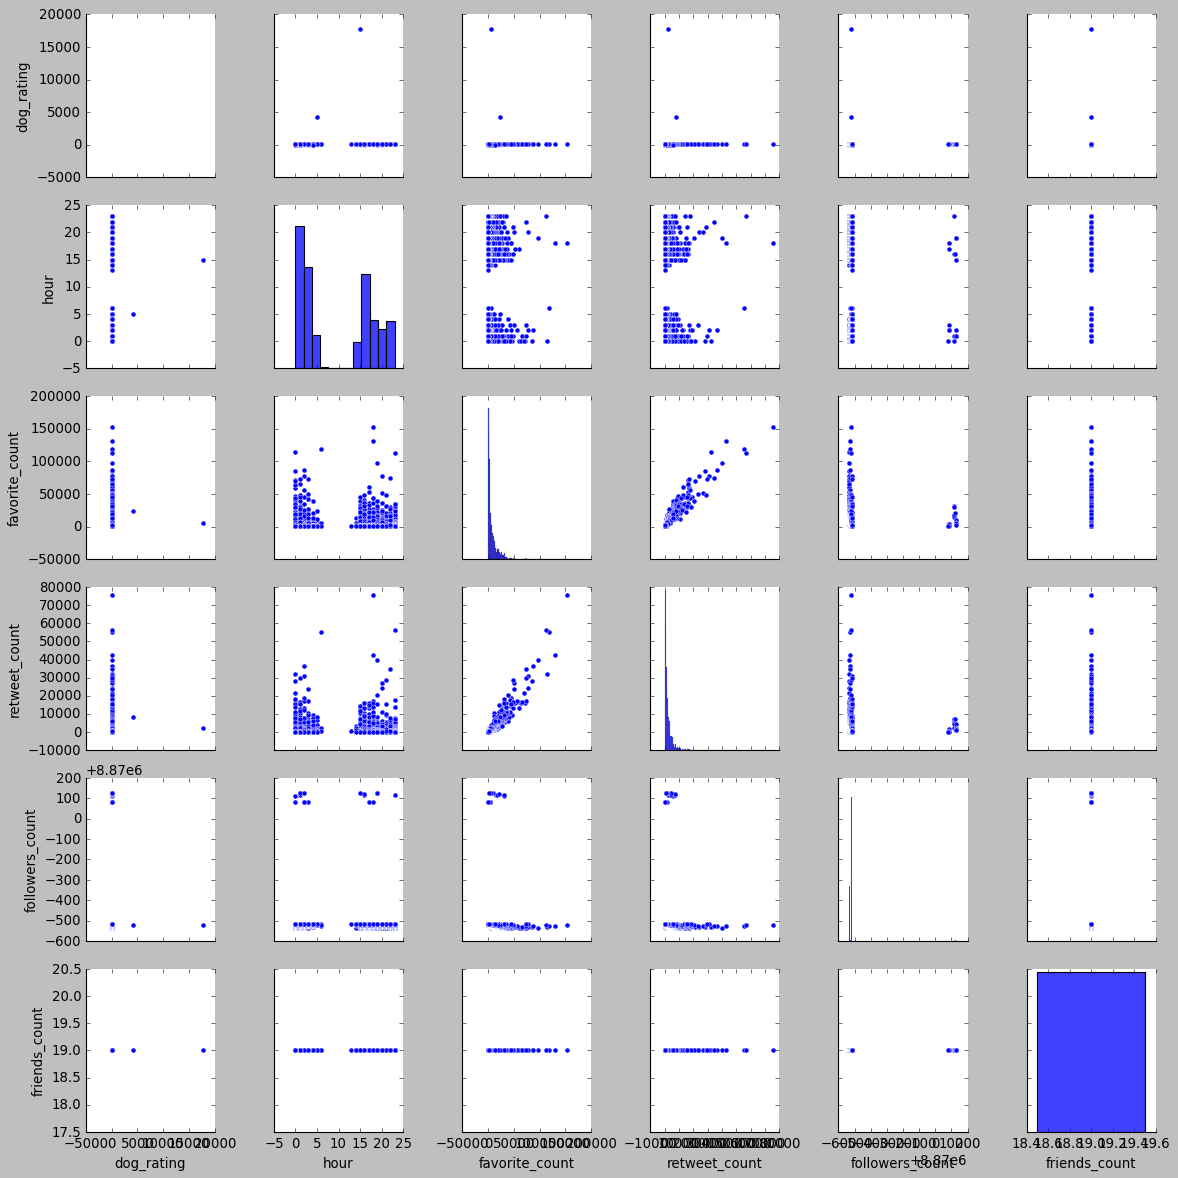

In [134]:
# Subplot grid for plotting pairwise relationships at twitter_archive_master dataset
g = sns.pairplot(twitter_archive_master)

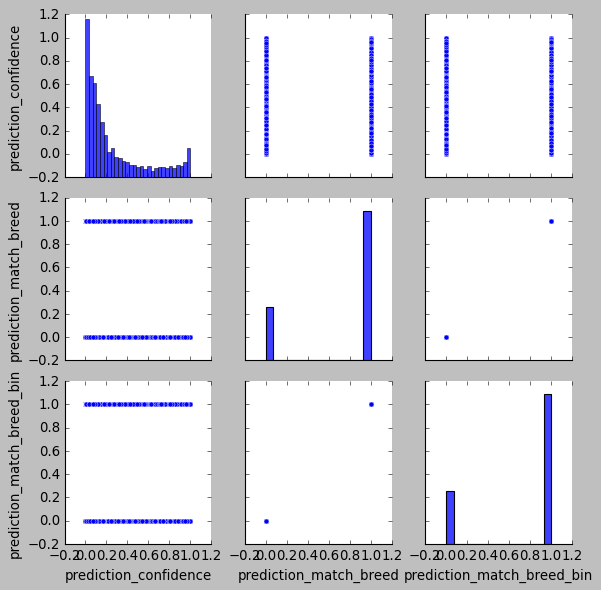

In [135]:
# Subplot grid for plotting pairwise relationships at image_prediction dataset
sns.pairplot(image_prediction)

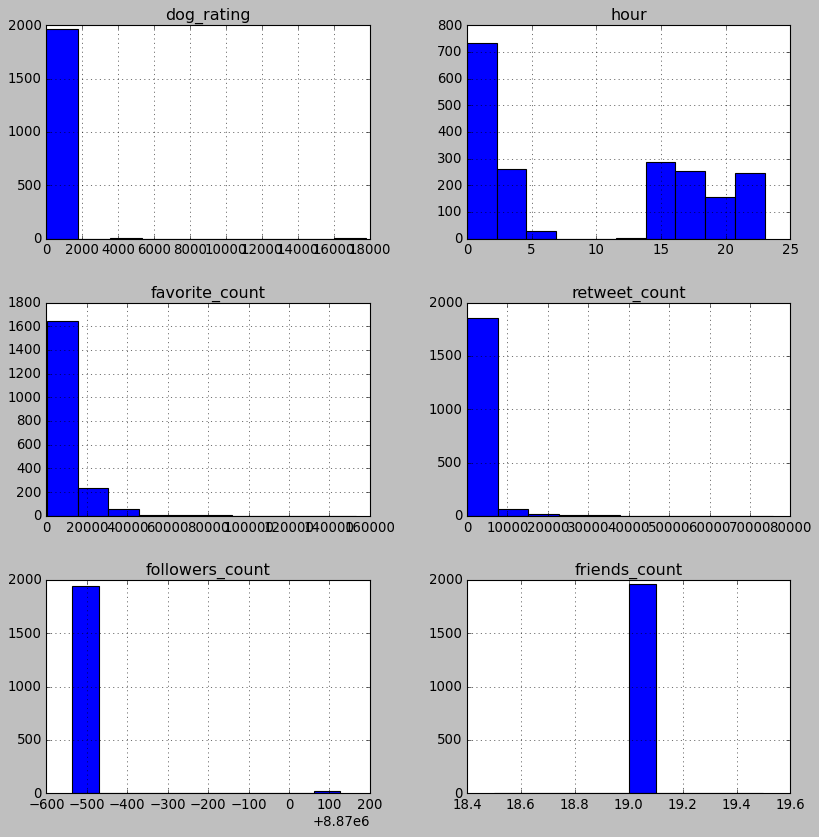

In [136]:
twitter_archive_master.hist(figsize = (12,12));

<AxesSubplot:>

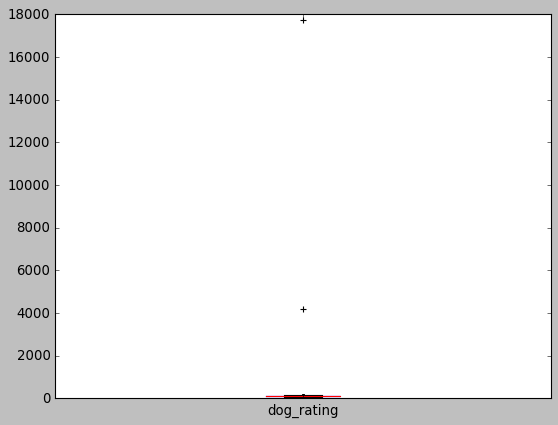

In [137]:
twitter_archive_master['dog_rating'].plot(kind='box')

In [138]:
twitter_archive_master.query('dog_rating > 4000')

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,dog_rating,date,time,hour,favorite_count,retweet_count,followers_count,friends_count
715,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,NaN,17760.0,2016-07-04,15:00:45,15,5035,2415,8869478,19
1688,670842764863651840,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,None,NaN,4200.0,2015-11-29,05:52:33,5,23280,8104,8869480,19


<AxesSubplot:>

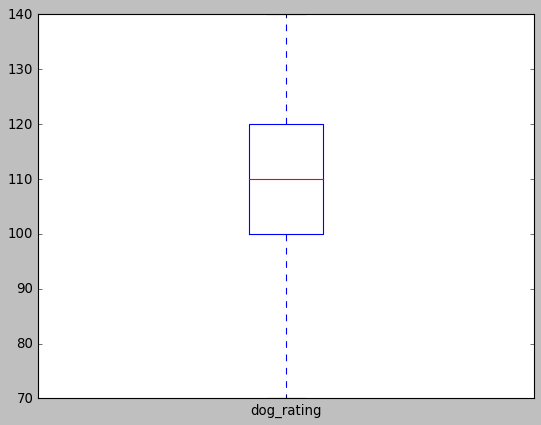

In [139]:
twitter_archive_master['dog_rating'].plot(kind='box', showfliers=False)

<AxesSubplot:>

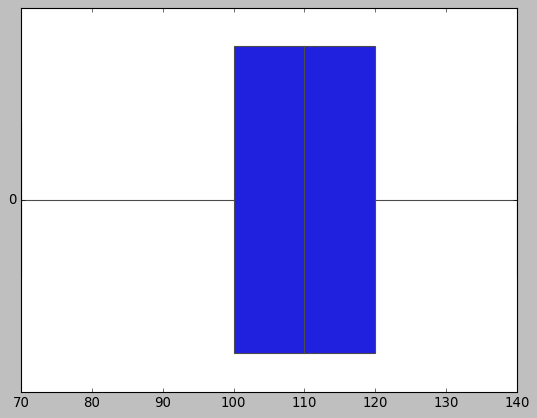

In [140]:
sns.boxplot(data=twitter_archive_master['dog_rating'],orient="h", showfliers=False) 

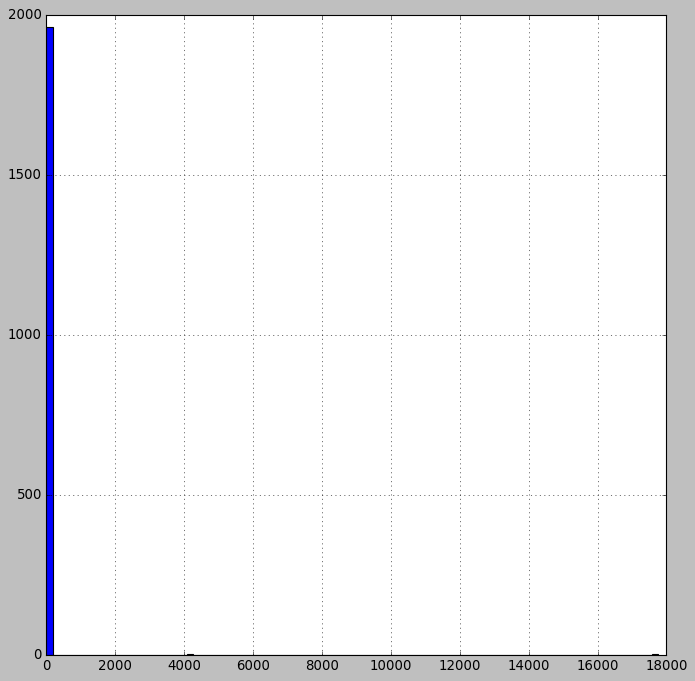

In [141]:
twitter_archive_master.dog_rating.hist(bins=100, figsize=(10,10));

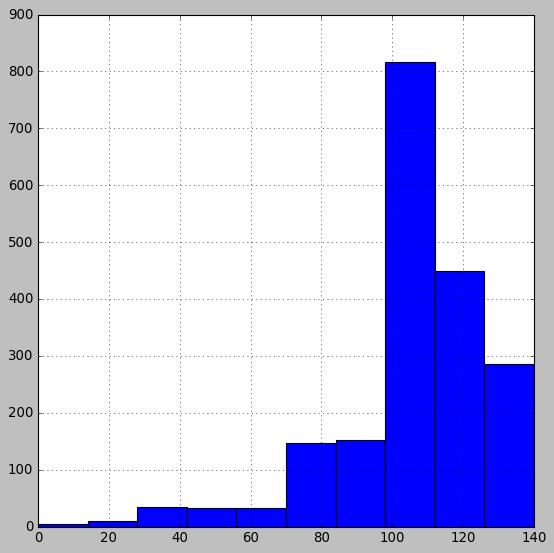

In [142]:
# Creating a plot communicating the conclusion using pandas.plot ()
twitter_archive_master.dog_rating.hist(bins=None, range=(0, 140), figsize=(8,8));

<AxesSubplot:title={'center':'Average dog_rating by dog_stage'}, xlabel='dog_stage'>

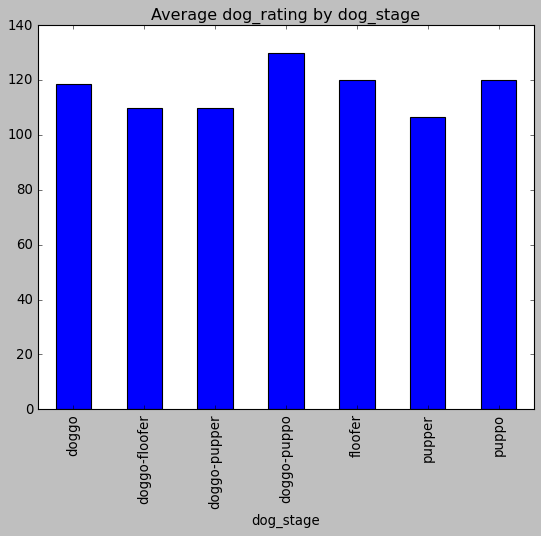

In [143]:
#creating a plot communicating the conclusion uisng pandas.plot ()
twitter_archive_master.groupby(['dog_stage'])['dog_rating'].mean().plot(kind='bar', title='Average dog_rating by dog_stage',  alpha=1)

<AxesSubplot:xlabel='dog_stage', ylabel='dog_rating'>

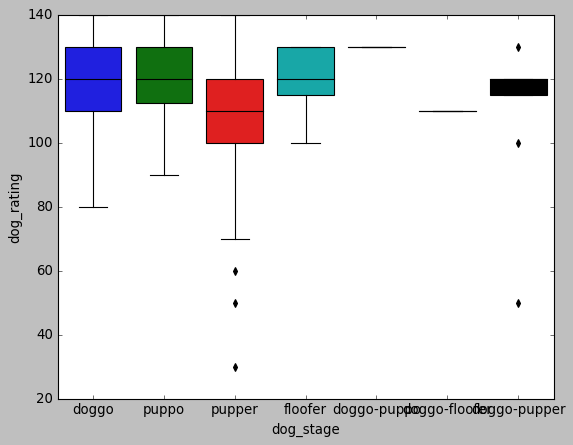

In [144]:
# Normal Boxplot
sns.boxplot(x="dog_stage", 
            y="dog_rating",
            data=twitter_archive_master)

---
---

### <font color='red'>Section 2:</font> <font color='darkblue'>Research Questions & Conclusion</font>

## **Q1_ <font color = 'darkred'>What are the main devices/apps that WeRateDogs' users use?</font>**

#### Chart

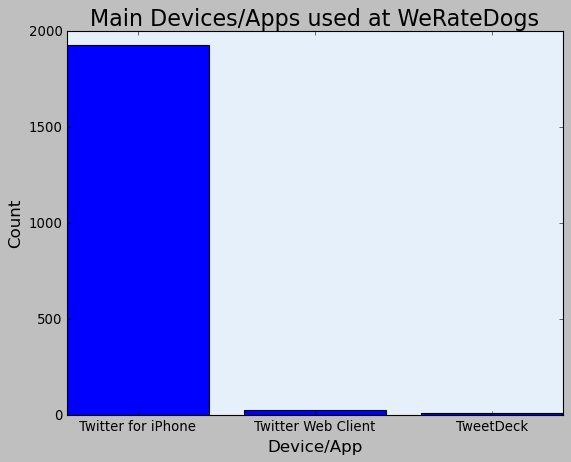

In [145]:
# Create a bar chart demonstrates Main Device/Apps which used by WeRateDogs users

x = twitter_archive_master.source.unique()
y = twitter_archive_master.source.value_counts()
plt.bar(x, y, width=0.8)
plt.title('Main Devices/Apps used at WeRateDogs', fontsize=20)
plt.xlabel('Device/App', fontsize=15)
plt.ylabel('Count', fontsize=15)


ax = plt.axes()
ax.set_facecolor('#e6f0fa')


#### Conclusion

* **Most** of WeRateDogs' users are using **'Twitter for iPhone'** using Twitter.

---

## **Q2_ <font color = 'darkred'>Is there a relationship between dog rates and retweet count?</font>**

#### Chart

(11.0, 75802.0)

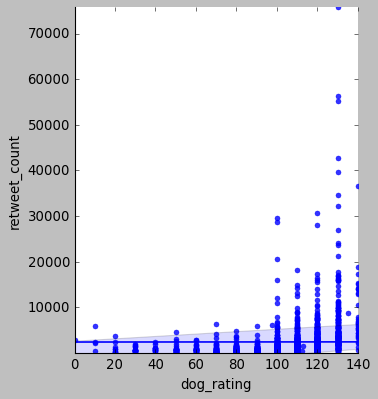

In [146]:
# Plot data and regression model fits across a FacetGrid
sns.lmplot(x="dog_rating", 
           y="retweet_count",
           data=twitter_archive_master)
plt.xlim(0, 140)
plt.ylim(11, 75802)

#### Conclusion

* It is clear that there is a **Positive relationship** between dog_rating & retweet_count.

---

## **Q3_ <font color = 'darkred'>Is there a relationship between dog rates and favorite count?</font>**

#### Chart

(70.0, 153082.0)

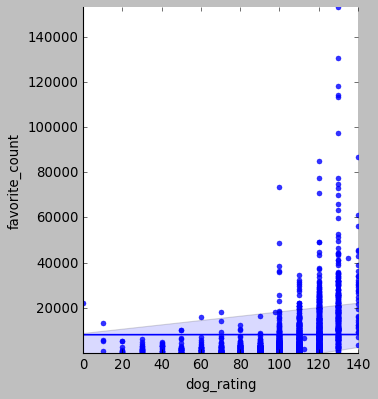

In [147]:
# Plot data and regression model fits across a FacetGrid
sns.lmplot(x="dog_rating", 
           y="favorite_count",
           data=twitter_archive_master)
plt.xlim(0, 140)
plt.ylim(70, 153082)

#### Conclusion

* It is clear that there is a **Positive relationship** between dog_rating & favorite_count.

---

## **Q4_ <font color = 'darkred'>Is there a relationship between favorite count retweet count?</font>**

#### Chart

(11.0, 75802.0)

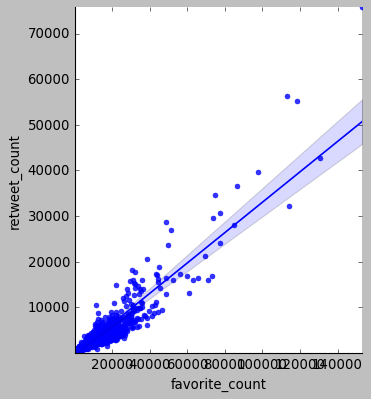

In [148]:
# Plot data and regression model fits across a FacetGrid
sns.lmplot(x="favorite_count", 
           y="retweet_count",
           data=twitter_archive_master)
plt.xlim(70, 153082)
plt.ylim(11, 75802)

#### Conclusion

* It is clear that there is a **Strong Positive relationship** between favorite_count & retweet_count.

---

## **Q5_ <font color = 'darkred'>What time that most of tweets are tweeted at</font>**?


Text(0, 0.5, 'Count of Tweets')

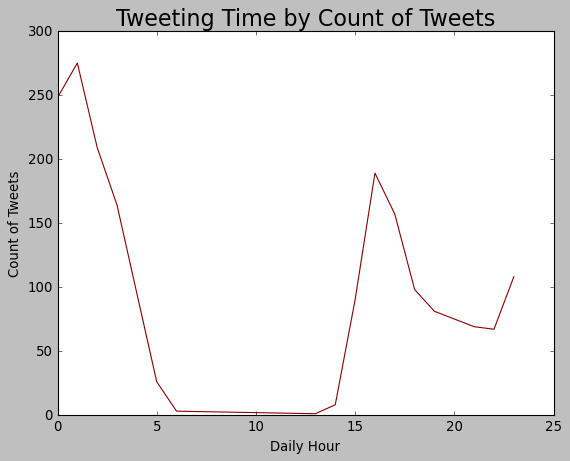

In [149]:
# Plot a Line Chart
twitter_archive_master.groupby(
    ['hour'])['tweet_id'].count().plot(
    kind='line', title='Predection/Reality Check', color=['darkred', 'Green'], alpha=1)


plt.title('Tweeting Time by Count of Tweets', fontsize=20)
plt.xlabel('Daily Hour', fontsize=12)
plt.ylabel('Count of Tweets', fontsize=12)

### Conclusion

* The **majority of tweets** were tweeted during hours **[12:00 AM to 03:00 AM]** and **[03:00 PM to 06:00 PM]**.

---

## **Q6_ <font color = 'darkred'>Is high confidence prediction meet reality more than low ones?</font>**

Text(0, 0.5, 'Average of Confidence Level')

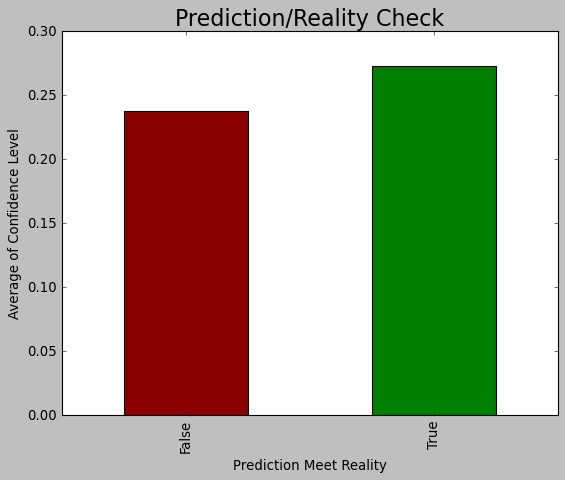

In [150]:
# Create a bar chart demonstrates Prediction Meet Reality values (True/False) Vs. Confidence Level

image_prediction.groupby(
    ['prediction_match_breed'])['prediction_confidence'].mean().plot(
    kind='bar', title='Predection/Reality Check', color=['darkred', 'Green'], alpha=1)


plt.title('Prediction/Reality Check', fontsize=20)
plt.xlabel('Prediction Meet Reality', fontsize=12)
plt.ylabel('Average of Confidence Level', fontsize=12)

#### Conclusion

* It seems that **High prediction confidence level** usually has good **True** reality than **Low confidence**.
* That proves the efficiency of the image prediction model.

---
---
---
---

### <font color='darkgreen'>5. Making Reports</font>

### <font color='red'>Effort Report:</font> <font color='darkblue'>'wrangle_report.pdf'</font>

**This file will be saved as <font color='red'>'wrangle_report.pdf'</font>, it demonstrates all wrangling and data processing efforts.**

### <font color='red'>Insights Report:</font> <font color='darkblue'>'act_report.pdf'</font>

**Please check <font color='red'>'act_report.pdf'</font>, it demonstrate Analysis Conclusion.**

---
---
---
---


# Code References

https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/overview/tweet-object

https://www.tutorialspoint.com/python_pandas/python_pandas_options_and_customization.htm

https://stackoverflow.com/questions/35077507/how-to-right-align-and-justify-align-in-markdown/40438921

https://stackoverflow.com/questions/19746350/how-to-change-color-in-markdown-cells-ipython-jupyter-notebook

https://www.kite.com/python/answers/how-to-load-and-parse-a-json-file-with-multiple-json-objects-in-python

https://www.codegrepper.com/code-examples/whatever/pd.set_option%28%27display.max_columns%27%2C+None%29

https://www.kite.com/python/answers/how-to-display-the-full-text-of-a-pandas-dataframe-in-python

https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas

https://www.tutorialspoint.com/python_pandas/python_pandas_options_and_customization.htm

https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/

https://stackoverflow.com/questions/45858155/removing-the-timestamp-from-a-datetime-in-pandas-dataframe

https://stackoverflow.com/questions/39662149/pandas-extract-date-and-time-from-timestamp

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

https://stackoverflow.com/questions/33446029/how-to-change-a-figures-size-in-python-seaborn-package

https://stackoverflow.com/questions/45204552/how-to-change-size-of-axis-labels-and-values-in-seaborn-pairsplot

https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

https://www.google.com/search?safe=active&sxsrf=ALeKk03_k_eQ1f7xEDzipLBGE_56sscitw%3A1604777859113&ei=g_emX7zKBuip1fAP8ISv4AE&q=what+is+TweetDeck+&oq=what+is+TweetDeck+&gs_lcp=CgZwc3ktYWIQAzIFCAAQyQMyAggAMgIIADICCAAyBggAEBYQHjIGCAAQFhAeMgYIABAWEB4yBggAEBYQHjIGCAAQFhAeMgYIABAWEB46CAgAEMkDEJECOggIABCxAxCDAToFCAAQsQM6CwguELEDEMcBEK8BOgQIABADOgQIIxAnOgcIABDJAxBDOgUIABCRAjoECAAQQzoFCC4QsQM6BQgAEMsBUPDnTFiEhU1gl4lNaABwAXgAgAH_AYgByQuSAQUwLjkuMZgBAKABAaABAqoBB2d3cy13aXrAAQE&sclient=psy-ab&ved=0ahUKEwj8l_Gxl_HsAhXoVBUIHXDCCxwQ4dUDCA0&uact=5

# Thanks for your Time :) ...